# Telecom Churn Prediction

### Problem Statement
* In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

* For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

* In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### Goal
It is our job to predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. Your target variable is "churn_probability"

### import the required packages

In [192]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# numpy and pandas import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

import math
import statsmodels.api as stm
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)


In [193]:
telecom_test = pd.read_csv("test.csv", na_values="NAN")
telecom_train = pd.read_csv("train.csv", na_values="NAN")
telecom_sample = pd.read_csv("sample.csv", na_values="NAN")
telecom_data_dictionary = pd.read_csv("data_dictionary.csv")



In [194]:
print("lets have a look at train data shape")
print(telecom_train.shape)

lets have a look at train data shape
(69999, 172)


In [195]:
print("lets data set info ")
print(telecom_train.head(10))

lets data set info 
   id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   
5   5        109             0.0             0.0             0.0   
6   6        109             0.0             0.0             0.0   
7   7        109             0.0             0.0             0.0   
8   8        109             0.0             0.0             0.0   
9   9        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   


In [196]:
telecom_data_dictionary

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [197]:
telecom_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [198]:
#Checking the numerical columns data distribution statistics
telecom_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

### Data Cleanup

In [199]:
# Drop columns which has only 1 unique values
telecom_train.drop(['circle_id', 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1,inplace=True)
telecom_train.shape

(69999, 168)

In [200]:
# some recharge columns have minimum value of 1 while some don't have
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
                 ]

telecom_train[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [201]:
# Finding other columns that have a single unique value
uniq_col= telecom_train.columns[telecom_train.nunique()==1]
telecom_train.drop(uniq_col,axis=1,inplace=True)
telecom_train.shape

(69999, 159)

In [202]:
telecom_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 159 entries, id to churn_probability
dtypes: float64(126), int64(27), object(6)
memory usage: 84.9+ MB


#### Understanding Categorical variables 

In [203]:
# Selecting only Categorical variables
cat_var=telecom_train.select_dtypes(['object']).columns.tolist()
print(cat_var)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [204]:
telecom_train[cat_var].describe()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,68898,68765,67538,17568,17865,18417
unique,30,31,31,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014
freq,11880,12206,10324,1317,1282,1388


In [205]:
# Checking the missing value percentage for Date columns
round(100*telecom_train[cat_var].isnull().sum()/len(telecom_train),1)

date_of_last_rech_6          1.6
date_of_last_rech_7          1.8
date_of_last_rech_8          3.5
date_of_last_rech_data_6    74.9
date_of_last_rech_data_7    74.5
date_of_last_rech_data_8    73.7
dtype: float64

In [206]:
# Missing values may imply that the user haven't recharged in that  month. Columns with more tan 70 % recharge values are dropped 
telecom_train.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)
telecom_train.shape

(69999, 156)

In [207]:
#Now the other date columns have to be convereted to datetime type
telecom_train['date_of_last_rech_6']=pd.to_datetime(telecom_train['date_of_last_rech_6'])
telecom_train['date_of_last_rech_7']=pd.to_datetime(telecom_train['date_of_last_rech_7'])
telecom_train['date_of_last_rech_8']=pd.to_datetime(telecom_train['date_of_last_rech_8'])
telecom_train[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-22,2014-07-10,2014-08-24
1,2014-06-12,2014-07-10,2014-08-26
2,2014-06-11,2014-07-22,2014-08-24
3,2014-06-15,2014-07-21,2014-08-25
4,2014-06-25,2014-07-26,2014-08-30


In [208]:
# Selecting only DateTime Columns
telecom_train.select_dtypes(include='datetime').columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

#### Lets Check the missing values in our data set

In [209]:
# we have totally 172 columns and 69999 rows lets find missing values percentage for each column
missingvalues = (telecom_train.isnull().sum() / telecom_train.isnull().count()*100).sort_values(ascending = False)
datatype=telecom_train.dtypes
missing_data = pd.concat([missingvalues, datatype], axis=1, keys=['MissingValues', 'DataType'])
print(missing_data)

                     MissingValues        DataType
arpu_3g_6                74.902499         float64
arpu_2g_6                74.902499         float64
fb_user_6                74.902499         float64
night_pck_user_6         74.902499         float64
total_rech_data_6        74.902499         float64
av_rech_amt_data_6       74.902499         float64
max_rech_data_6          74.902499         float64
count_rech_3g_6          74.902499         float64
count_rech_2g_6          74.902499         float64
arpu_3g_7                74.478207         float64
count_rech_2g_7          74.478207         float64
fb_user_7                74.478207         float64
night_pck_user_7         74.478207         float64
max_rech_data_7          74.478207         float64
total_rech_data_7        74.478207         float64
count_rech_3g_7          74.478207         float64
arpu_2g_7                74.478207         float64
av_rech_amt_data_7       74.478207         float64
count_rech_2g_8          73.689

In [210]:
# Columns with more than 70 % misisng values are dropped excluding columns corresponding to total_rech_data_* and av_rech_amt_data_*
col_to_drop=telecom_train.columns[round(100*telecom_train.isnull().sum()/len(telecom_train),2)> 70]
data_col=['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_6']
col_to_drop=[col for col in col_to_drop if col not in data_col]
telecom_train.drop(col_to_drop,axis=1,inplace=True)
telecom_train.shape

(69999, 134)

In [211]:
def impute(*args):
    for col in args:
        telecom_train[col].fillna(0,inplace=True)

num_col=telecom_train.select_dtypes(include= np.number).columns.tolist()
impute(*num_col)

In [212]:
# Checking the missing value % again
col=telecom_train.columns[telecom_train.isnull().any()].tolist()
round(100*telecom_train[col].isnull().sum()/len(telecom_train),2)

date_of_last_rech_6    1.57
date_of_last_rech_7    1.76
date_of_last_rech_8    3.52
dtype: float64

In [213]:
telecom_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 134 entries, id to churn_probability
dtypes: datetime64[ns](3), float64(104), int64(27)
memory usage: 71.6 MB


#### Data Preparation

In [214]:
# Calcuating the Average recharge amount as the sum of total recharge amount and the total data recharge amount
# Total data recharge is calculated as the product of total number of data recharge & Average data recharge amount
telecom_train['avg_total_rech_amt_67']=(telecom_train['total_rech_amt_6']+telecom_train["total_rech_data_6"]*telecom_train['av_rech_amt_data_6']+
                                 telecom_train['total_rech_amt_7']+telecom_train["total_rech_data_7"]*telecom_train['av_rech_amt_data_7'])/2

In [215]:
print("Recharge amount at 70th percentile: {0}".format(telecom_train.avg_total_rech_amt_67.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


### Filter high-value customers

In [216]:
# Since our High value customers are determined based on average recharge value for month 6 & 7, 
# We are Creating average column for all attributes of Month 6 and 7

mth67_col_list = telecom_train.select_dtypes(include=['int64','float64']).filter(regex='_6$|_7$').columns.str[:-2]
mth67_col_list_unq = list(mth67_col_list.unique())
mth67_col_list_unq.remove('total_rech_amt')
print(mth67_col_list_unq)

for col in mth67_col_list_unq:
    avg_col_nm = 'avg_'+col+'_67'
    telecom_train[avg_col_nm] = (telecom_train[col+'_6'] + telecom_train[col+'_7'])/2

['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g']


In [217]:
# since average column is created, dropping actual month 6 & 7 columns

telecom_train.drop(telecom_train.select_dtypes(include=['int64','float64']).filter(regex='_6$|_7$').columns,axis=1,inplace=True)
telecom_train.shape

(69999, 92)

In [218]:
q=telecom_train['avg_total_rech_amt_67'].quantile(.7)
df=telecom_train[telecom_train['avg_total_rech_amt_67']>=q]
df.shape

(21013, 92)

In [219]:
def churn_def(row):
    if (row['total_ic_mou_8']==0) & (row['total_og_mou_8']==0) &(row['vol_2g_mb_8']==0) & (row['vol_3g_mb_8']==0):
        return 1
    else: return 0

In [220]:
df['Churn']=df.apply(churn_def,axis=1)
df.head()

,id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_total_rech_amt_67,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_loc_og_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_std_og_mou_67,avg_isd_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mou_67,avg_loc_ic_t2f_mou_67,avg_loc_ic_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,Churn
4,4,101.565,6.13,9.63,0.0,0.0,6.13,4.61,5.01,0.00,15.76,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15.76,2.66,19.49,6.14,28.31,0.0,0.00,0.0,0.00,28.31,0.0,0.0,0.0,8,122,30,2014-06-25,2014-07-26,2014-08-30,30,6.0,213.47,0.00,0,6,0,0,647,0.0,0.00,0.00,0,1494.0,184.4495,13.055,47.550,26.82,7.865,7.495,28.310,6.610,4.925,42.425,0.0,2.175,0.0,2.175,0.0,8.500,0.00,53.100,3.415,7.455,4.570,15.450,0.0,0.000,0.000,0.000,15.450,0.000,0.0,0.000,11.5,45.5,17.5,7.0,183.0,349.845,0.00,0.0,6.5,0.0,0.5,0
15,15,338.286,194.43,197.09,0.0,0.0,194.43,185.88,4.94,0.00,385.26,0.0,0.00,6.26,6.26,0.0,0.00,0.0,391.53,335.43,285.63,8.88,629.94,0.0,0.00,0.0,0.00,629.94,0.0,0.0,0.0,4,652,250,2014-06-27,2014-07-25,2014-08-30,250,1.0,354.35,0.00,1,0,0,0,602,0.0,0.00,0.00,0,604.0,478.9215,17.710,329.450,0.00,0.000,17.710,322.320,7.085,0.000,347.125,0.0,0.000,0.0,0.000,0.0,0.040,0.05,347.215,17.020,486.775,0.965,504.770,0.0,0.000,0.515,0.515,505.285,0.000,0.0,0.000,4.0,250.0,75.0,0.5,77.0,130.210,0.00,0.5,0.0,0.0,0.0,0
23,23,479.762,0.89,386.91,0.0,0.0,0.89,378.01,8.88,0.00,387.79,0.0,0.00,0.00,0.00,0.0,0.01,0.0,387.81,30.39,148.83,23.66,202.89,0.0,0.00,0.0,0.00,203.29,0.0,0.0,0.4,10,494,144,2014-06-30,2014-07-31,2014-08-22,30,0.0,0.00,0.00,0,0,0,0,455,0.0,0.00,0.00,0,1205.0,1018.2270,616.120,371.785,0.00,0.000,616.120,252.210,18.505,0.000,886.845,0.0,101.040,0.0,101.040,0.0,0.025,0.00,987.910,175.455,201.135,43.195,419.795,0.0,103.515,0.000,103.515,523.450,0.065,0.0,0.075,22.5,110.0,80.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0
24,24,240.449,29.86,222.03,0.0,0.0,29.86,99.86,0.00,0.36,129.73,0.0,121.79,0.00,121.79,0.0,0.36,0.0,251.89,19.14,150.73,1.13,171.01,0.0,21.93,0.0,21.93,192.94,0.0,0.0,0.0,10,240,30,2014-06-24,2014-07-25,2014-08-30,30,1.0,0.00,0.00,0,1,0,0,1219,0.0,0.00,0.00,0,491.0,362.0215,65.735,519.475,0.00,0.000,65.735,189.365,0.000,0.000,255.110,0.0,330.100,0.0,330.100,0.0,0.000,0.00,585.220,45.165,138.660,0.765,184.600,0.0,8.250,0.000,8.250,192.860,0.000,0.0,0.000,7.0,110.0,55.0,1.5,34.5,0.020,0.00,0.0,1.5,0.0,0.0,0
27,27,421.300,12.68,182.83,0.0,0.0,12.68,157.23,25.59,0.00,195.51,0.0,0.00,0.00,0.00,0.0,0.00,0.0,195.51,82.81,159.69,107.94,350.46,0.4,0.00,0.0,0.40,350.86,0.0,0.0,0.0,4,250,164,2014-06-29,2014-07-20,2014-08-23,61,3.0,10.54,1342.93,0,1,1,1,573,700.4,185.71,173.72,0,1282.5,370.7370,10.030,145.945,0.00,0.000,10.030,123.175,21.495,0.000,154.710,0.0,1.265,0.0,1.265,0.0,0.000,0.00,155.975,67.785,171.750,77.485,317.035,0.0,0.000,7

In [221]:
# checking the percentage of churned customers
round(100*df['Churn'].sum()/len(df),2)

5.33

In [222]:
# Droppiing date columns as they are not useful in model building
date_col=[col for col in df.columns if 'date' in col]
df.drop(date_col,axis=1,inplace=True)
df.shape

(21013, 90)

In [223]:
import math
def func_bar(*args,data_df):
    m=math.ceil(len(args)/2)  # getting the length of arguments to determine the shape of subplots
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 6*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        sns.countplot(x=col, data=data_df,ax=ax_li[i], order = data_df[col].value_counts().index)
        ax_li[i].set_title(col)
        ax_li[i].set_yscale('log')
        plt.tight_layout()
        i=i+1

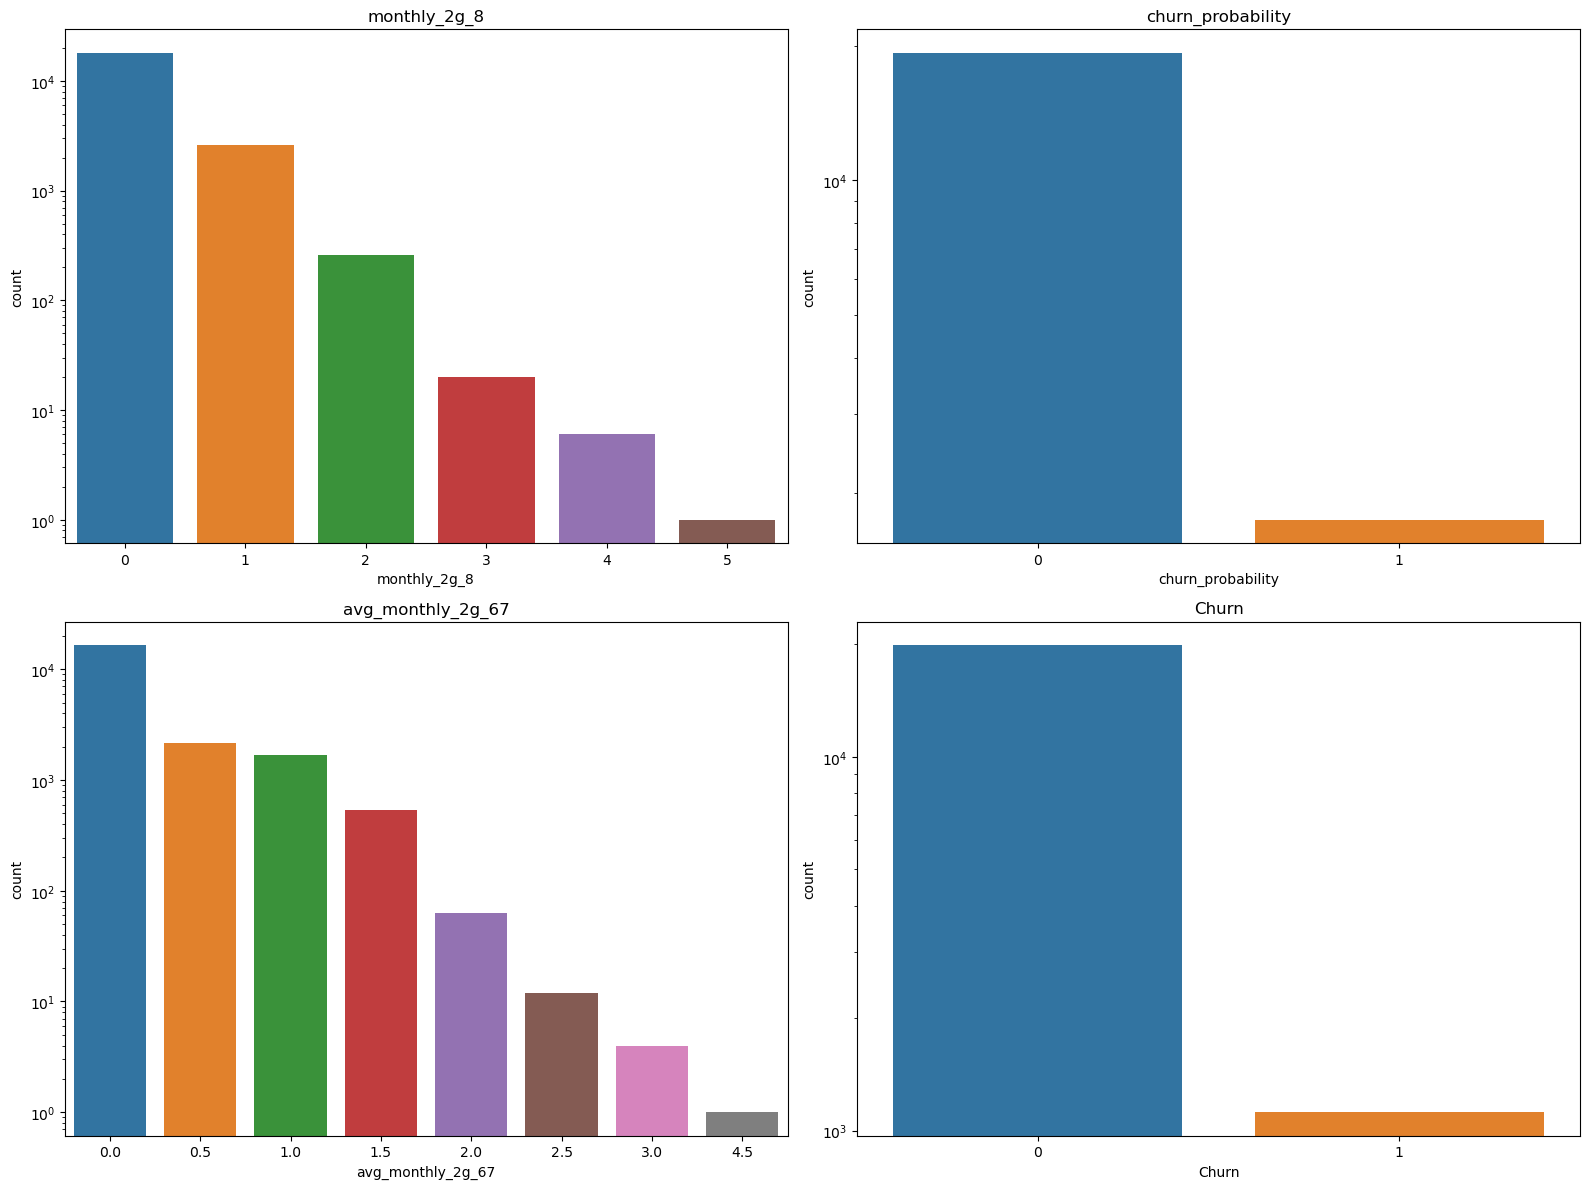

In [224]:
# Plotting Bar chart for data attributes
col_10=df.columns[df.nunique()<=10].tolist()  # Selecting columns that have less than 11 unique values for plotting using barchart
func_bar(*col_10,data_df=df)

In [225]:
#function for box plot
def bx_plot(*args,data): 
    
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 8*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        
        sns.boxplot(col, data, ax=ax_li[i])  # plotting the box plot
        ax_li[i].set_title(col)
        #ax_li[i].set_xscale('log')
        plt.tight_layout()
        i=i+1

In [226]:
# plotting the distribution for recharge amount 
col_rech = [col for col in df.columns if 'rech' in col]
col_rech

['total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'total_rech_data_8',
 'avg_total_rech_amt_67',
 'avg_total_rech_num_67',
 'avg_max_rech_amt_67',
 'avg_total_rech_data_67',
 'avg_av_rech_amt_data_67']

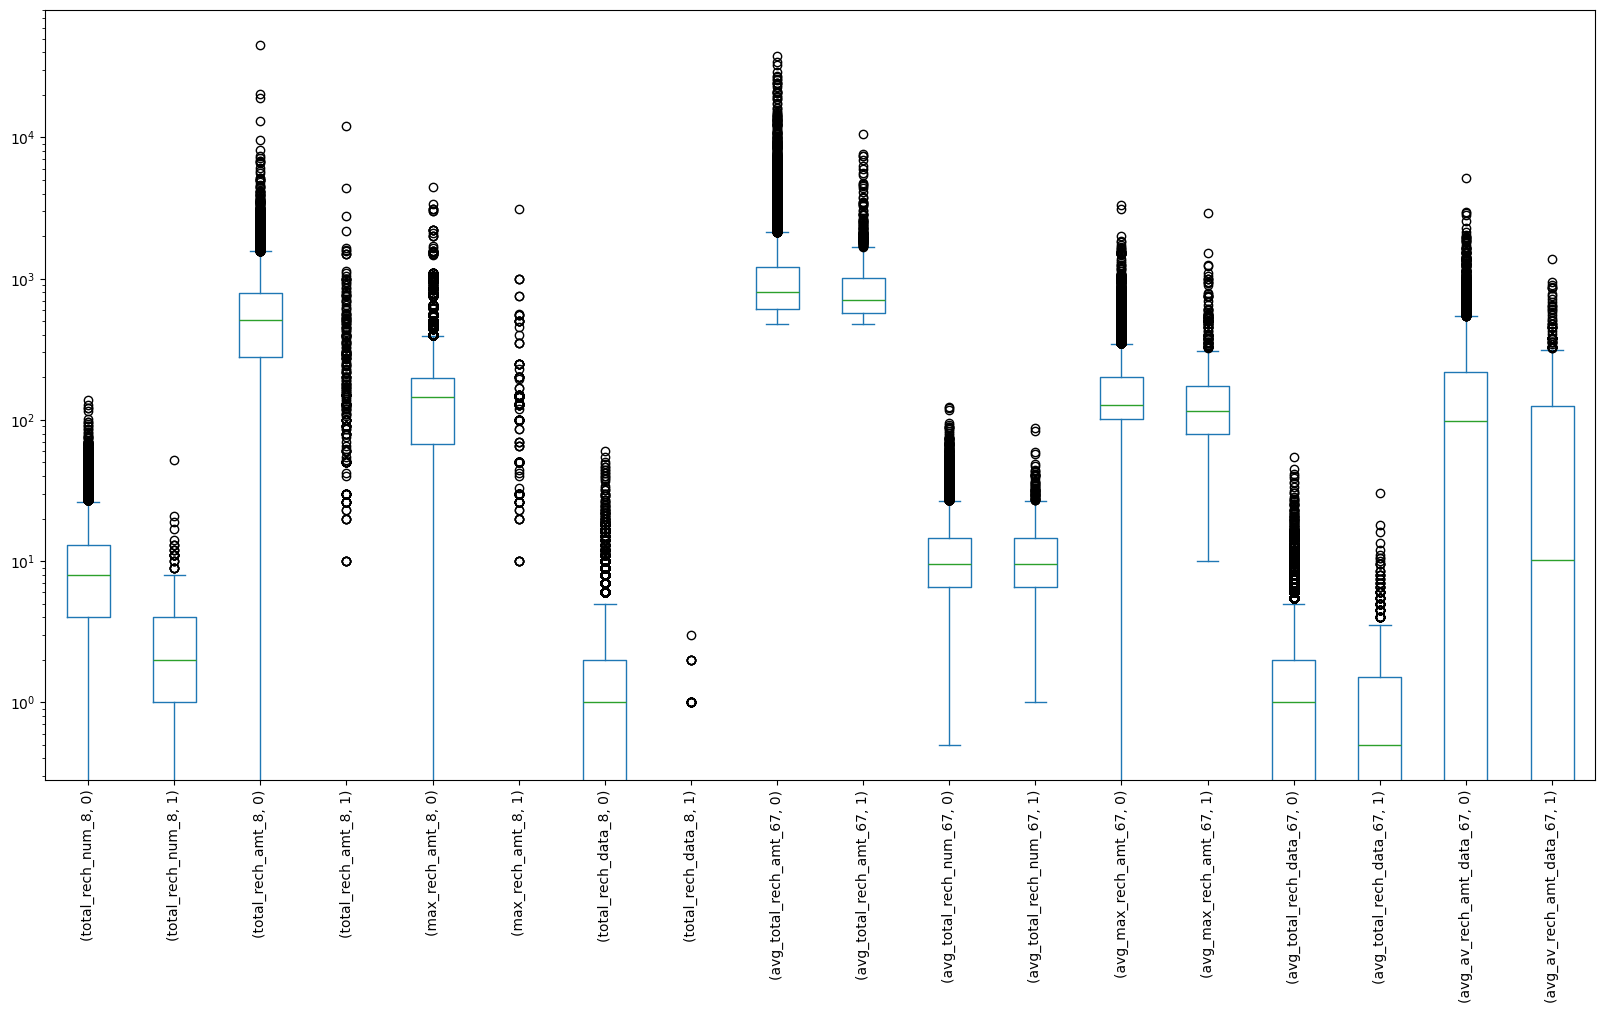

In [227]:
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df.pivot(columns='Churn')[col_rech].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

In [228]:
# Checking the data distribution of each attibute across multiple percentiles
df[col_rech].describe(percentiles=[.75,0.9,0.99,0.999,0.9999,.99999])

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,total_rech_data_8,avg_total_rech_amt_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67
count,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000
mean,9.969781,582.536858,159.340551,1.621948,1152.410582,11.792390,169.763599,1.760101,135.156310
std,9.213430,634.469775,167.659000,3.013318,1340.680623,8.614143,150.438822,2.731950,182.196782
min,0.000000,0.000000,0.000000,0.000000,477.500000,0.500000,0.000000,0.000000,0.000000
50%,8.000000,491.000000,130.000000,1.000000,798.500000,9.500000,127.500000,1.000000,92.000000
75%,13.000000,770.000000,198.000000,2.000000,1206.000000,14.500000,199.000000,2.000000,212.000000
90%,20.000000,1139.000000,252.000000,5.000000,1980.900000,22.000000,299.000000,5.000000,312.500000
99%,44.000000,2328.000000,951.000000,13.000000,6179.700000,45.000000,790.000000,12.000000,785.380000
99.9%,71.976000,4983.620000,1580.000000,29.988000,18663.754000,73.500000,1505.494000,25.000000,1650.350000
99.99%,121.898800,18323.599200,3100.000000,49.898800,32248.610400,115.672400,2839.086400,41.348200,2924.177600


In [229]:
q=df['total_rech_amt_8'].quantile(0.9999) 
df=df[df['total_rech_amt_8']<=q]
df.shape

(21010, 90)

In [230]:
# Checking for highly correlated columns
# function to eliminate redundant pairs
def redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()   # to ensure that duplicate pairs are not present
    cols = df.columns       # getting list of all solumns in dataframe  
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# function to get highly correlated pairs
def get_top_abs_correlations(df, n):     
    cor = df.corr().abs().unstack()  # getting the absolute value of all correlation coefficienrs
    labels_to_drop = redundant_pairs(df)
    cor = cor.drop(labels=labels_to_drop).sort_values(ascending=False)
    return cor[0:n]

In [231]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[col_rech],10))

Top Absolute Correlations
total_rech_num_8        avg_total_rech_num_67      0.727250
total_rech_data_8       avg_total_rech_data_67     0.713980
max_rech_amt_8          avg_max_rech_amt_67        0.650064
avg_total_rech_amt_67   avg_total_rech_data_67     0.638953
                        avg_av_rech_amt_data_67    0.620112
total_rech_amt_8        max_rech_amt_8             0.523826
total_rech_data_8       avg_total_rech_amt_67      0.464406
total_rech_num_8        total_rech_amt_8           0.405450
avg_total_rech_data_67  avg_av_rech_amt_data_67    0.399931
avg_total_rech_num_67   avg_max_rech_amt_67        0.334298
dtype: float64


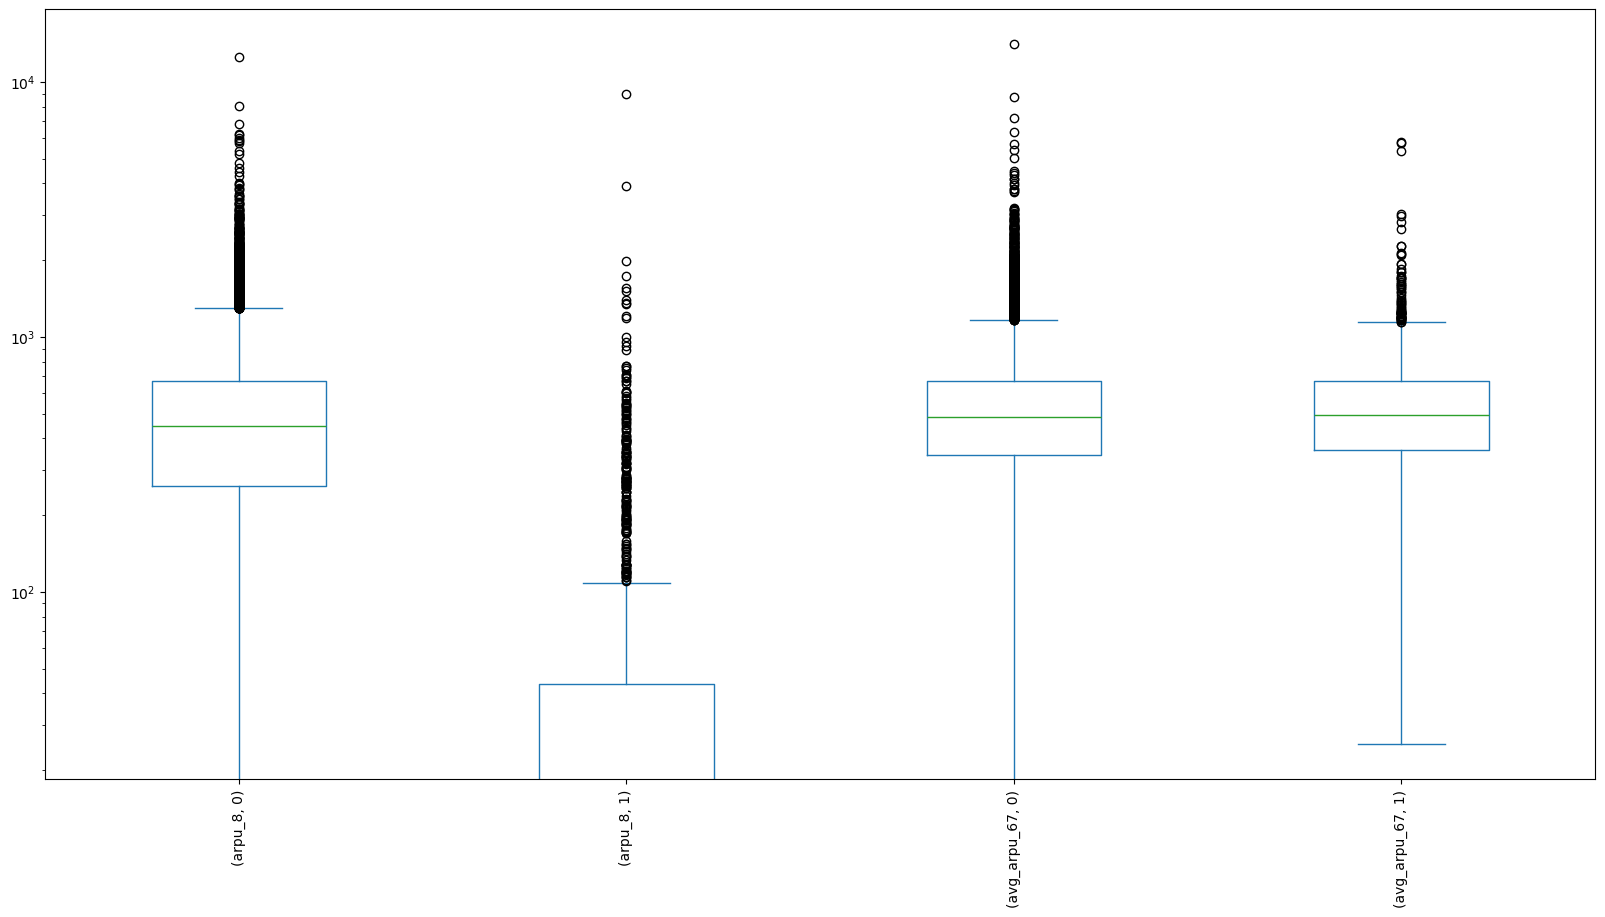

In [232]:
# plotting the distribution for arpu
col_arpu= [col for col in df.columns if 'arpu' in col]

fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df.pivot(columns='Churn')[col_arpu].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

In [233]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[col_arpu],4))

Top Absolute Correlations
arpu_8  avg_arpu_67    0.690875
dtype: float64


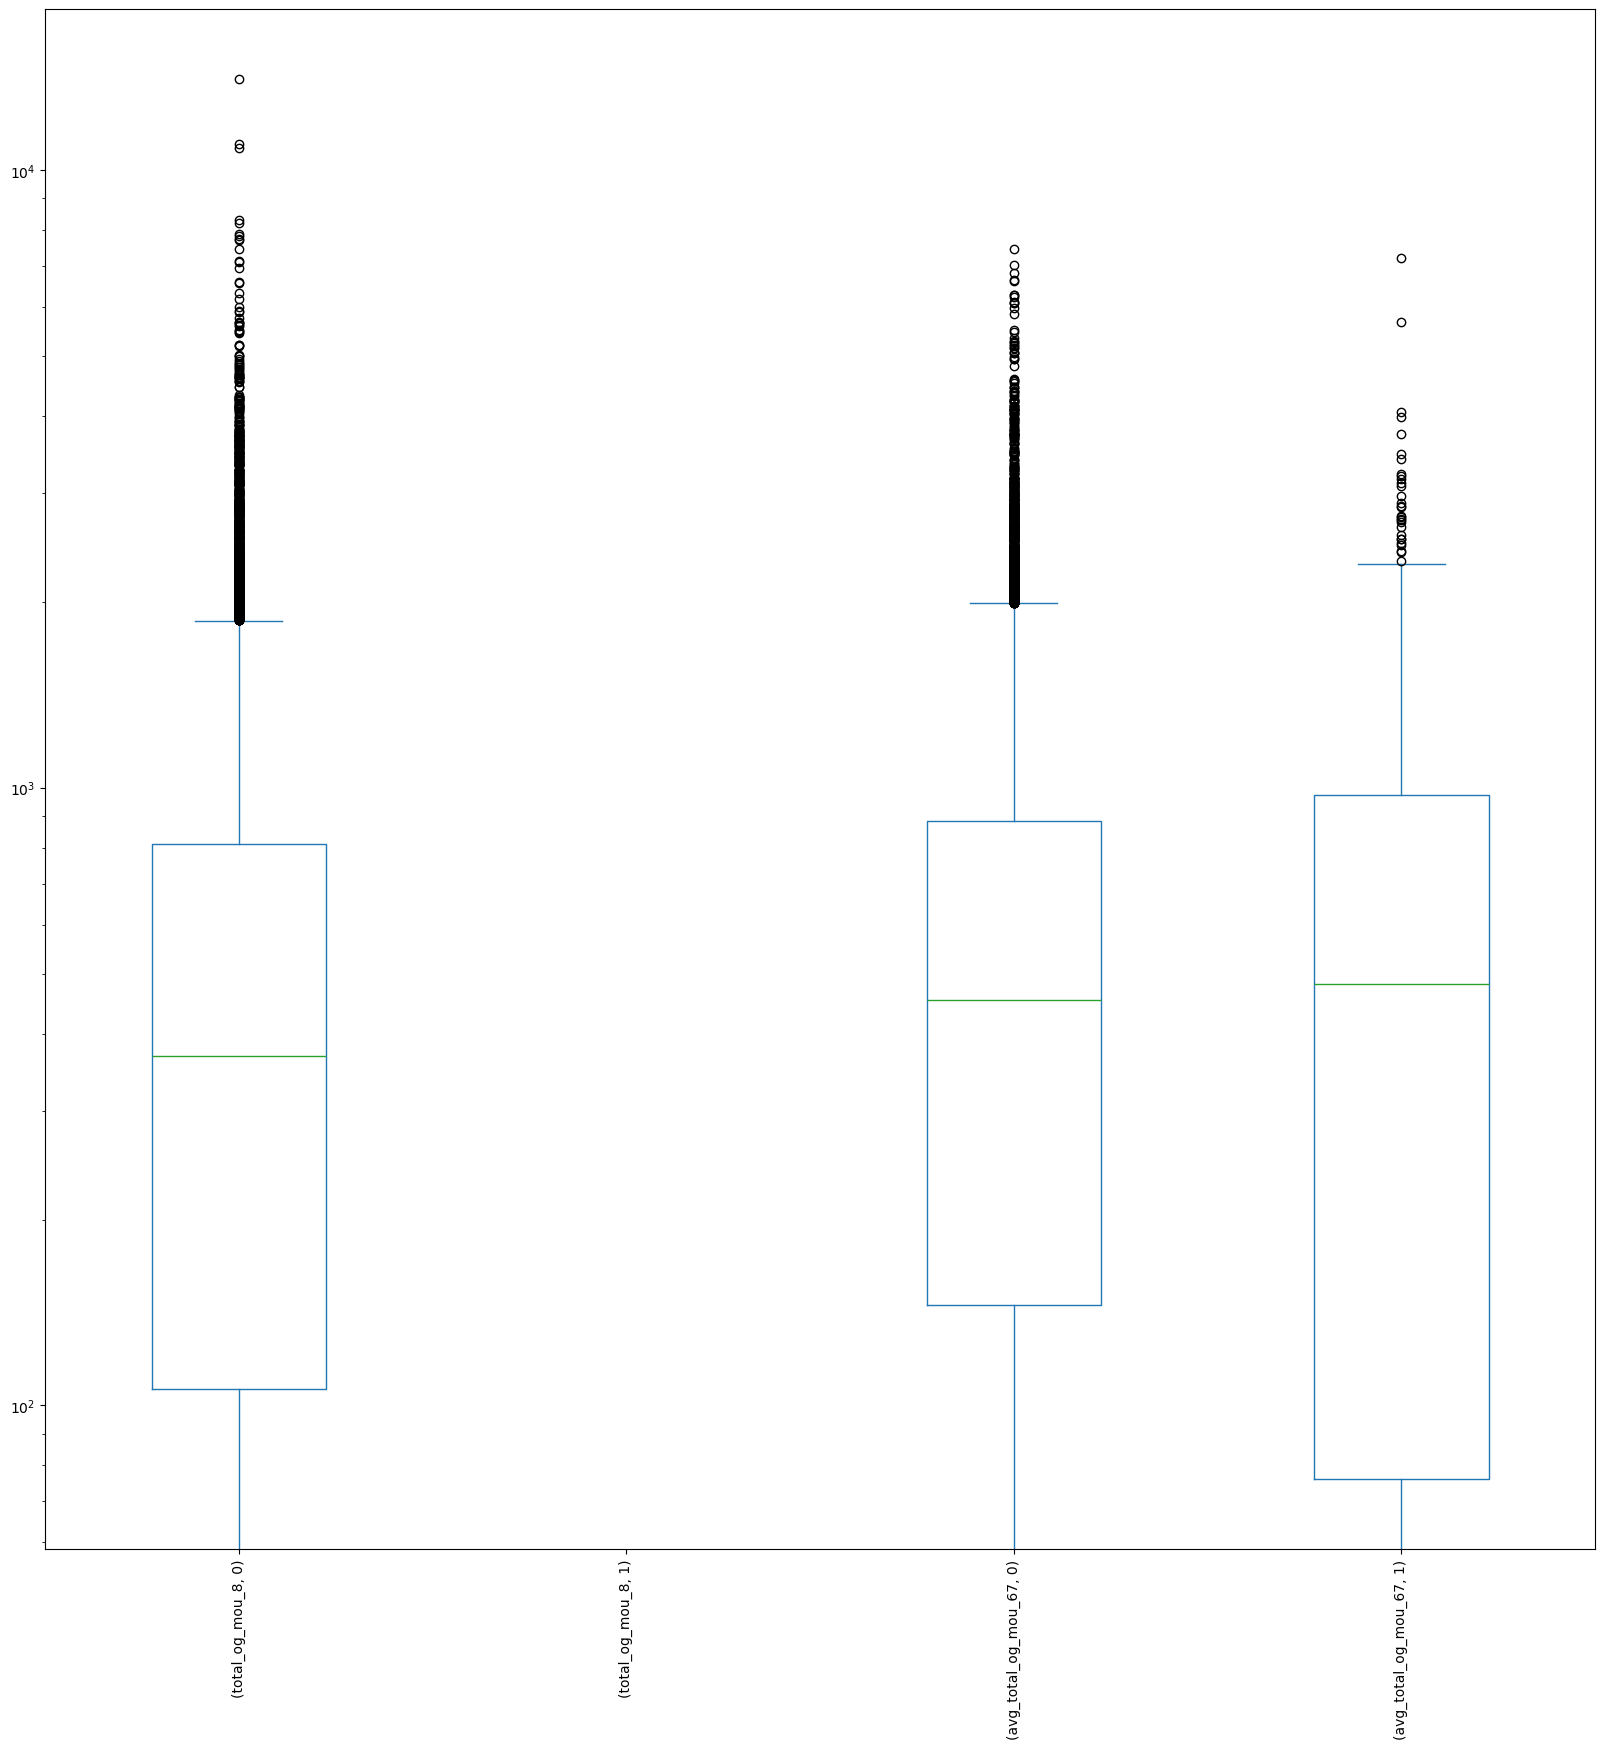

In [234]:
# plotting the distribution for outgoing calls
col_og = [col for col in df.columns if 'total_og' in col]
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 20))
ax=axes[0][0]

df.pivot(columns='Churn')[col_og].plot(kind = 'box',ax=ax)
ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

#### The total outgoing calls decreases for the churned customers

In [235]:
og = [col for col in df.columns if 'og' in col]
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[og],30))

Top Absolute Correlations
std_og_mou_8           total_og_mou_8           0.852766
avg_std_og_mou_67      avg_total_og_mou_67      0.835385
loc_og_mou_8           avg_loc_og_mou_67        0.832391
loc_og_t2f_mou_8       avg_loc_og_t2f_mou_67    0.825840
loc_og_t2t_mou_8       avg_loc_og_t2t_mou_67    0.824762
isd_og_mou_8           avg_isd_og_mou_67        0.803207
loc_og_t2m_mou_8       avg_loc_og_t2m_mou_67    0.796018
avg_loc_og_t2m_mou_67  avg_loc_og_mou_67        0.790659
loc_og_t2m_mou_8       loc_og_mou_8             0.780395
loc_og_t2t_mou_8       loc_og_mou_8             0.779724
avg_loc_og_t2t_mou_67  avg_loc_og_mou_67        0.771654
std_og_t2f_mou_8       avg_std_og_t2f_mou_67    0.768650
std_og_t2t_mou_8       avg_std_og_t2t_mou_67    0.760681
std_og_t2m_mou_8       std_og_mou_8             0.756498
std_og_t2t_mou_8       std_og_mou_8             0.748984
avg_std_og_t2m_mou_67  avg_std_og_mou_67        0.748904
avg_std_og_t2t_mou_67  avg_std_og_mou_67        0.745134
std_o

In [236]:
# Dropping columns with more than 75% correlation
df.drop(['std_og_mou_8','avg_std_og_mou_67','avg_loc_og_mou_67', 'avg_loc_og_t2t_mou_67','avg_isd_og_mou_67','avg_loc_og_t2m_mou_67','loc_og_t2m_mou_8',
         'avg_std_og_t2f_mou_67','avg_loc_og_t2f_mou_67','avg_std_og_t2t_mou_67','avg_std_og_mou_67'],axis=1,inplace=True)
df.shape

(21010, 80)

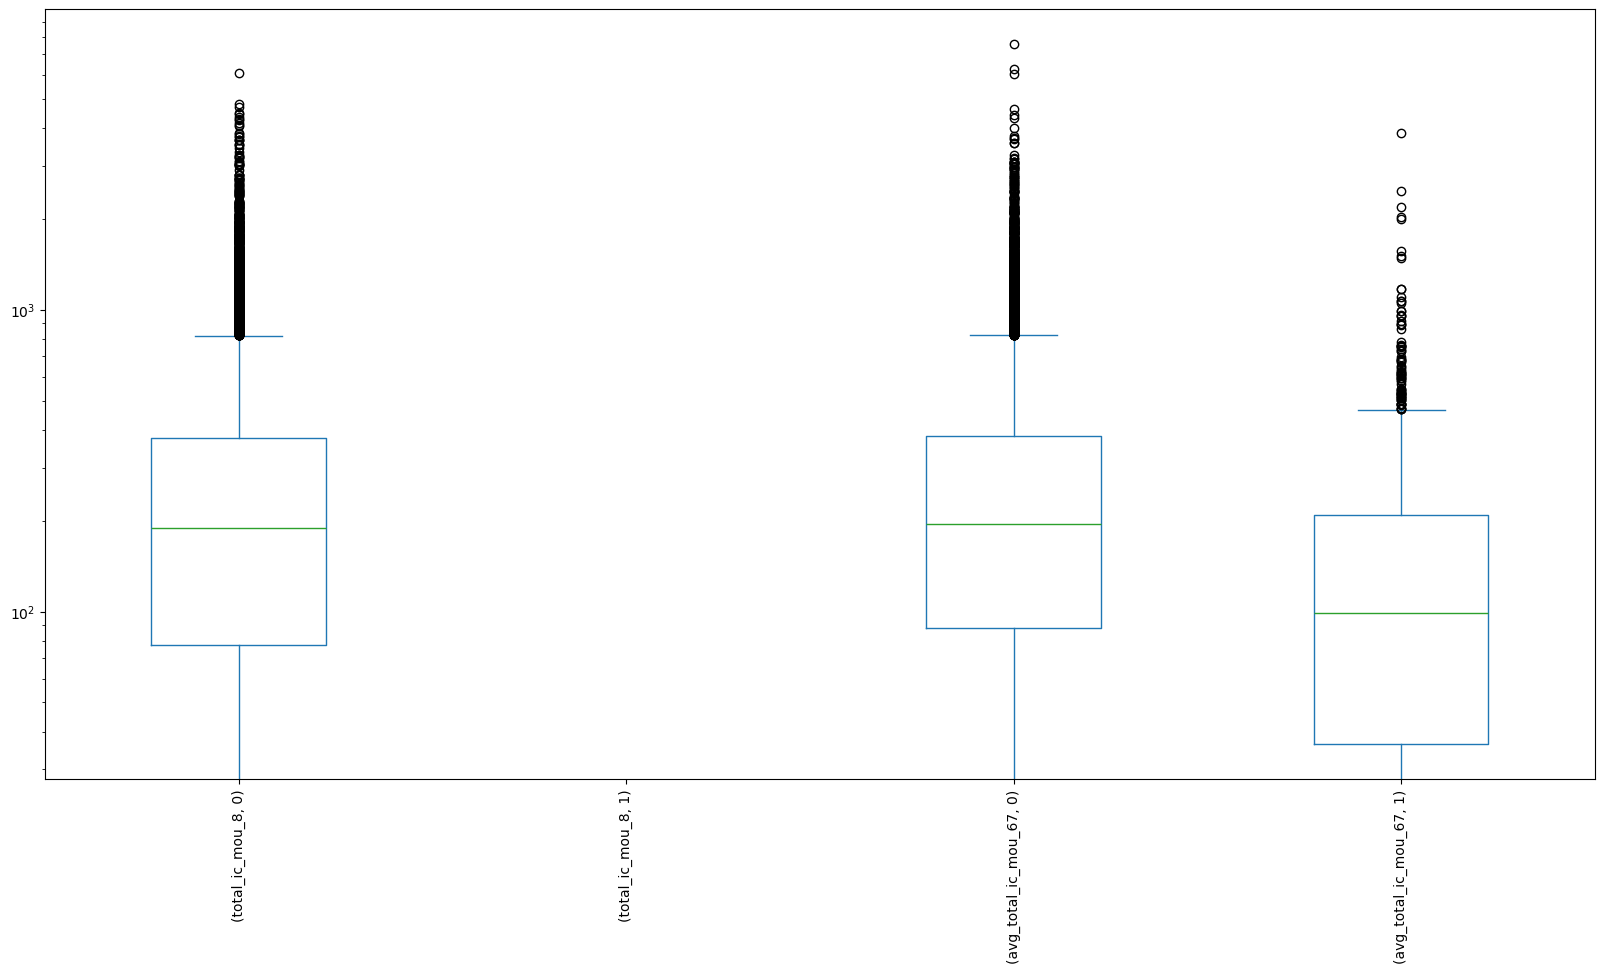

In [237]:
# plotting the distribution for incoming calls
col_ic = [col for col in df.columns if 'total_ic' in col]
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df.pivot(columns='Churn')[col_ic].plot(kind = 'box',ax=ax)
ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

Incoming calls gradually decrease over the months for the churned customers

In [238]:
ic = [col for col in df.columns if 'ic' in col]
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[ic],25))

Top Absolute Correlations
loc_ic_mou_8           total_ic_mou_8           0.901725
avg_loc_ic_mou_67      avg_total_ic_mou_67      0.896941
avg_loc_ic_t2m_mou_67  avg_loc_ic_mou_67        0.844095
std_ic_t2m_mou_8       std_ic_mou_8             0.839212
loc_ic_t2m_mou_8       loc_ic_mou_8             0.838797
loc_ic_mou_8           avg_loc_ic_mou_67        0.826013
avg_std_ic_t2m_mou_67  avg_std_ic_mou_67        0.825154
total_ic_mou_8         avg_total_ic_mou_67      0.804723
loc_ic_t2m_mou_8       avg_loc_ic_t2m_mou_67    0.803745
ic_others_8            avg_ic_others_67         0.797163
loc_ic_t2t_mou_8       avg_loc_ic_t2t_mou_67    0.790257
loc_ic_t2f_mou_8       avg_loc_ic_t2f_mou_67    0.775057
std_ic_t2f_mou_8       avg_std_ic_t2f_mou_67    0.769785
loc_ic_t2m_mou_8       total_ic_mou_8           0.765975
avg_loc_ic_t2m_mou_67  avg_total_ic_mou_67      0.760878
loc_ic_mou_8           avg_total_ic_mou_67      0.744412
total_ic_mou_8         avg_loc_ic_mou_67        0.741122
std_i

In [239]:
# Dropping columns with more than 75% correlation
df.drop(['loc_ic_mou_8','avg_loc_ic_mou_67','std_ic_t2m_mou_8','avg_std_ic_mou_67','avg_loc_ic_t2m_mou_67','avg_loc_ic_t2t_mou_67',
         'avg_loc_ic_t2f_mou_67'],axis=1,inplace=True)
df.shape

(21010, 73)

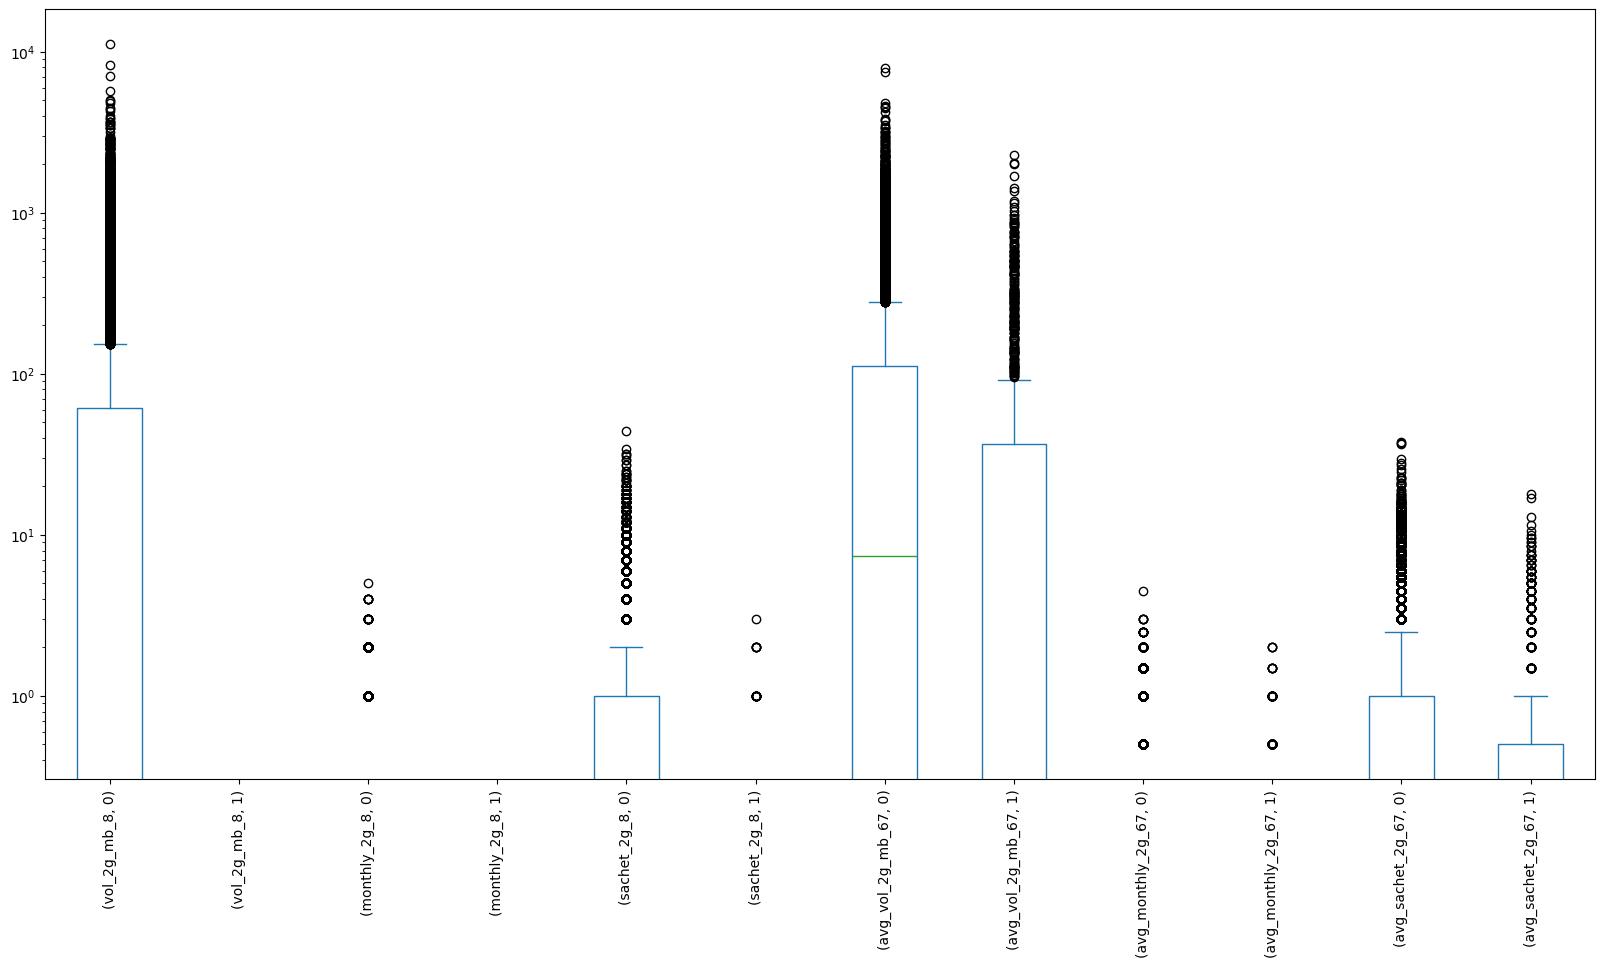

In [240]:
# plotting the distribution for  2g data
col_2g= [col for col in df.columns if '2g' in col]

fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df.pivot(columns='Churn')[col_2g].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

Data usage decreases over the months for churned customers

In [241]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[col_2g],5))

Top Absolute Correlations
sachet_2g_8       avg_sachet_2g_67     0.726333
vol_2g_mb_8       avg_vol_2g_mb_67     0.651739
monthly_2g_8      avg_monthly_2g_67    0.599930
avg_vol_2g_mb_67  avg_monthly_2g_67    0.361106
vol_2g_mb_8       monthly_2g_8         0.307426
dtype: float64


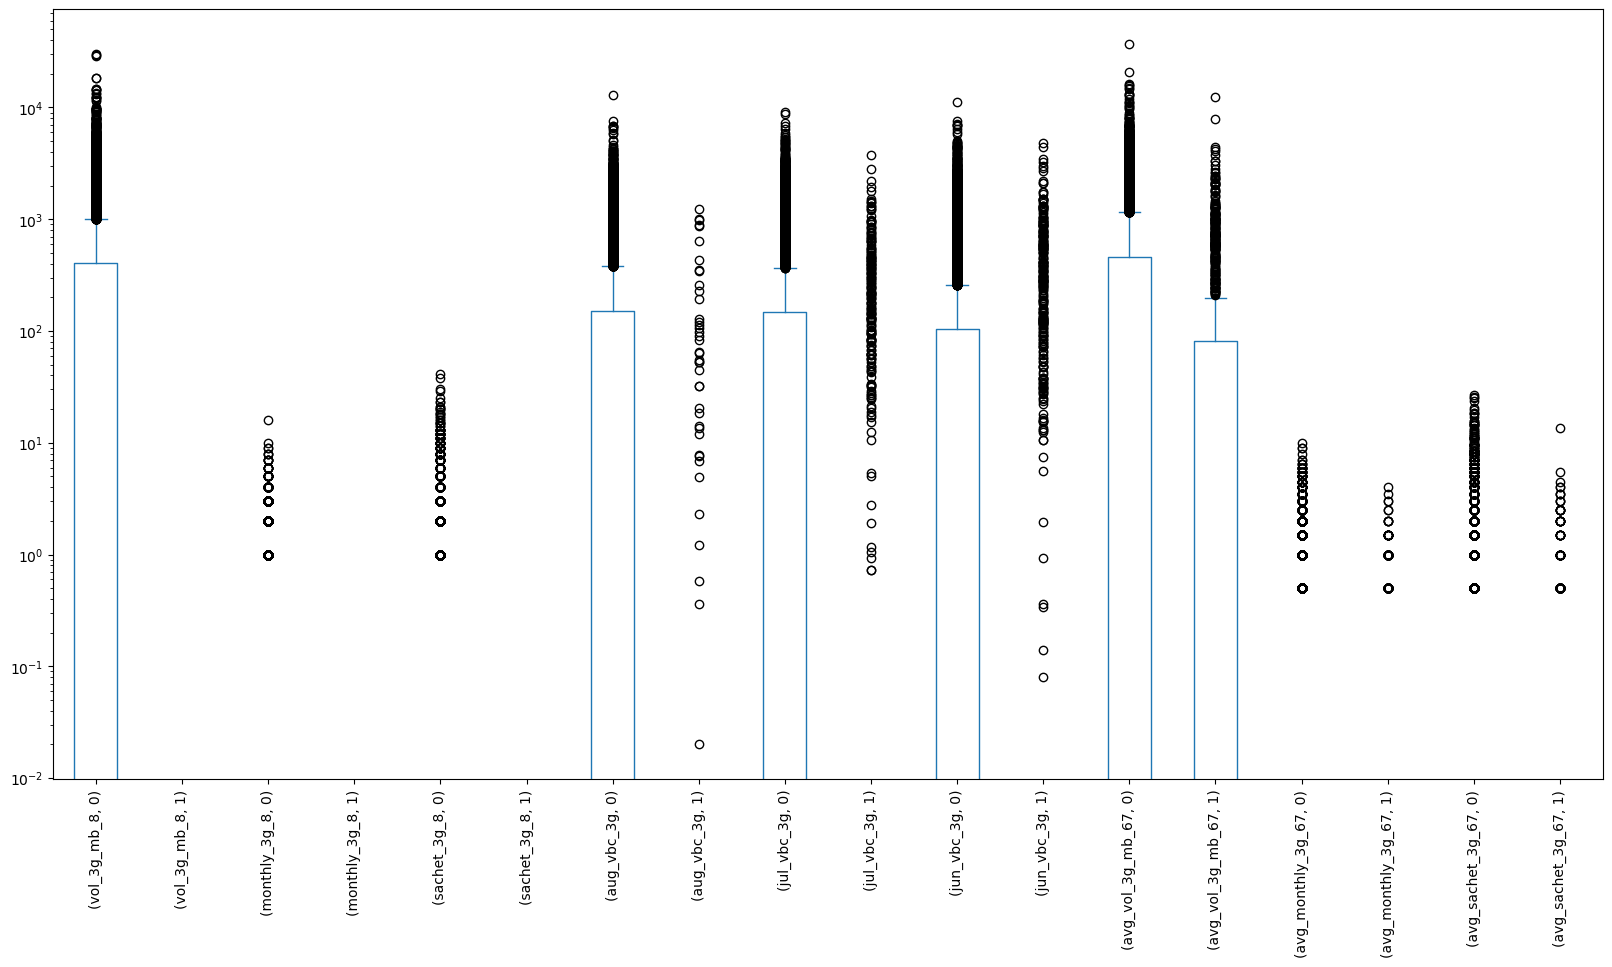

In [242]:
# plotting the distribution for  3g data
col_3g= [col for col in df.columns if '3g' in col]

fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df.pivot(columns='Churn')[col_3g].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

Data usage decreases over the months for churned customers

In [243]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[col_3g],5))

Top Absolute Correlations
vol_3g_mb_8   avg_vol_3g_mb_67     0.754244
aug_vbc_3g    jul_vbc_3g           0.693944
monthly_3g_8  avg_monthly_3g_67    0.677827
jul_vbc_3g    jun_vbc_3g           0.665469
sachet_3g_8   avg_sachet_3g_67     0.663732
dtype: float64


In [244]:
df.drop('avg_vol_3g_mb_67',axis=1,inplace=True)
df.shape

(21010, 72)

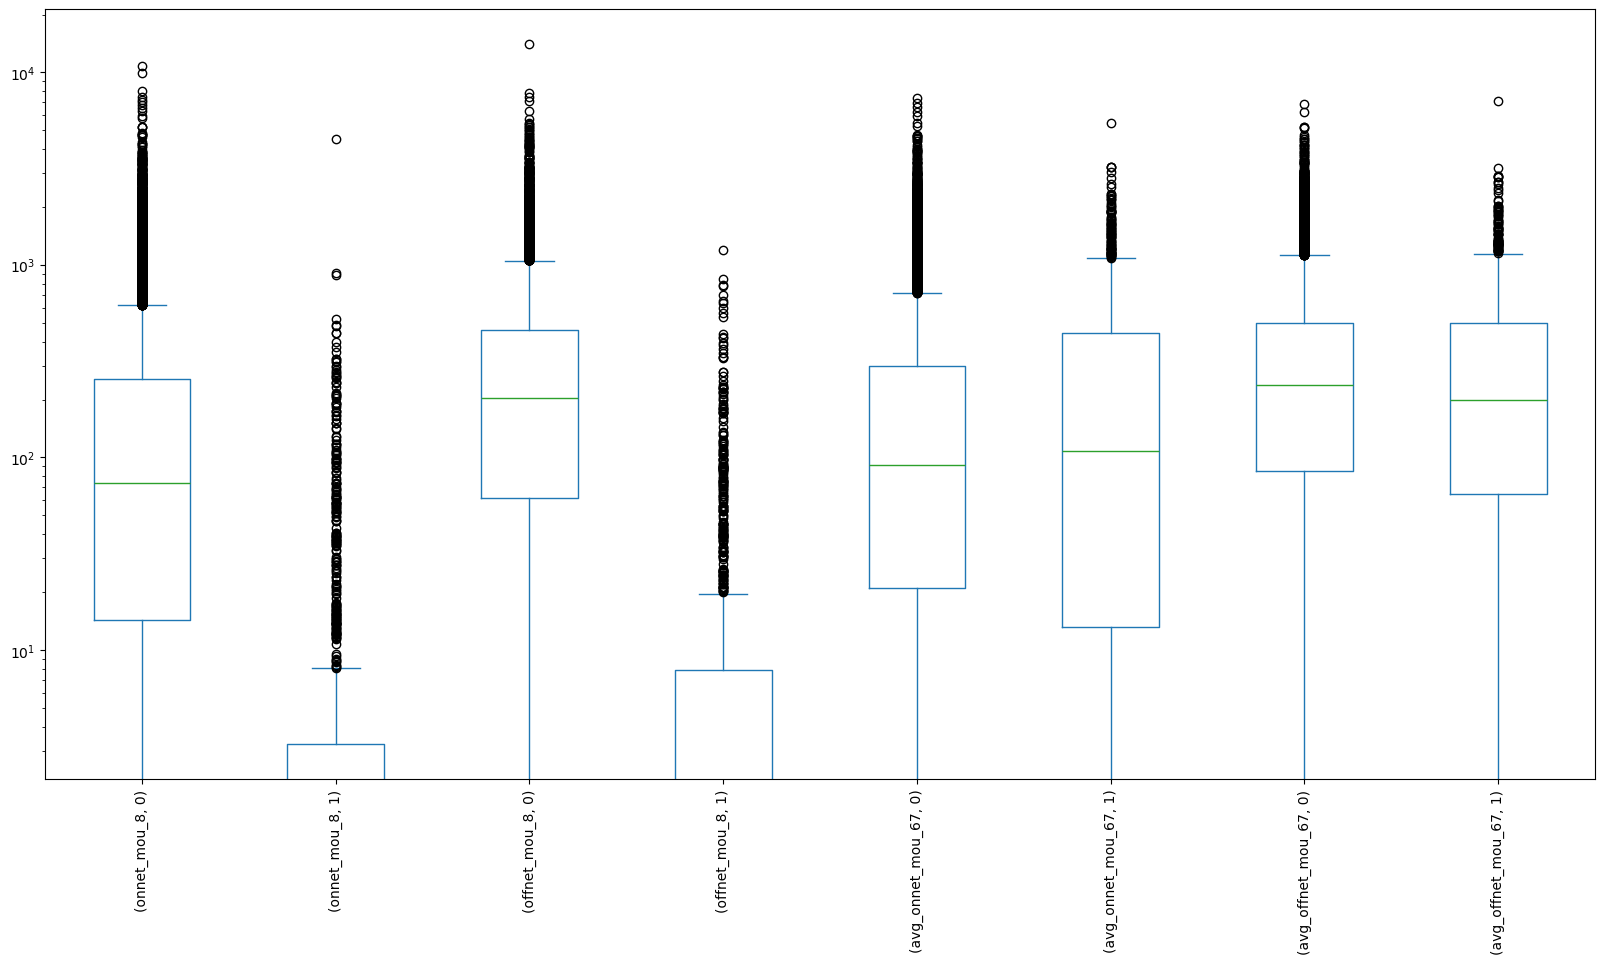

In [245]:
# plotting the distribution for onnet and offnet
col_on= [col for col in df.columns if 'net' in col]

fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df.pivot(columns='Churn')[col_on].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

In [246]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[col_on],5))

Top Absolute Correlations
onnet_mou_8       avg_onnet_mou_67     0.769069
offnet_mou_8      avg_offnet_mou_67    0.717915
onnet_mou_8       offnet_mou_8         0.131426
                  avg_offnet_mou_67    0.086376
avg_onnet_mou_67  avg_offnet_mou_67    0.078859
dtype: float64


In [247]:
# Dropping columns with more than 75 % correlation
df.drop('avg_onnet_mou_67',axis=1,inplace=True)
df.shape

(21010, 71)

In [248]:
# Getting top correlation for entire dataframe
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[df.columns.tolist()[1:]], 20))

Top Absolute Correlations
arpu_8                   total_rech_amt_8          0.943231
avg_total_rech_data_67   avg_sachet_2g_67          0.906391
total_rech_data_8        sachet_2g_8               0.897475
onnet_mou_8              std_og_t2t_mou_8          0.858542
offnet_mou_8             std_og_t2m_mou_8          0.858190
avg_offnet_mou_67        avg_std_og_t2m_mou_67     0.844234
total_ic_mou_8           avg_total_ic_mou_67       0.804723
ic_others_8              avg_ic_others_67          0.797163
loc_og_t2t_mou_8         loc_og_mou_8              0.779724
std_ic_t2f_mou_8         avg_std_ic_t2f_mou_67     0.769785
loc_ic_t2m_mou_8         total_ic_mou_8            0.765975
offnet_mou_8             total_og_mou_8            0.748723
onnet_mou_8              total_og_mou_8            0.738731
avg_offnet_mou_67        avg_total_og_mou_67       0.729577
total_rech_num_8         avg_total_rech_num_67     0.727250
avg_av_rech_amt_data_67  avg_monthly_3g_67         0.727086
sachet_2g_8   

In [249]:
# Dropping columns with more than 75 % correlation
col_to_drop=['arpu_8','avg_sachet_2g_67','sachet_2g_8','std_og_t2t_mou_8','offnet_mou_8','avg_std_og_t2m_mou_67',
             'loc_og_t2t_mou_8']
df.drop(col_to_drop,axis=1,inplace=True)
df.shape

(21010, 64)

In [250]:
churn_rate = (sum(df["churn_probability"])/len(df["churn_probability"].index))*100
churn_rate

8.277010947168014

In [251]:
# Putting feature variable to X
X = df.drop('churn_probability',axis=1)

# Putting response variable to y
y = df['churn_probability']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [252]:
print(X_train.shape)
cols=X_train.columns
print(cols)

(14707, 63)
Index(['id', 'onnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'avg_total_rech_amt_67', 'avg_arpu_67',
       'avg_offnet_mou_67', 'avg_roam_ic_mou_67', 'avg_roam_og_mou_67',
       'avg_loc_og_t2c_mou_67', 'avg_spl_og_mou_67', 'avg_og_others_67',
       'avg_total_og_mou_67', 'avg_std_ic_t2t_mou_67', 'avg_std_ic_t2m_mou_67',
       'avg_std_ic_t2f_mou_67

In [253]:
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14707,)
(6303, 63)
(6303,)


In [254]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [255]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [256]:
# SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy=1.0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [257]:
print("Dimension of X_smt Shape:", X_train_sm.shape)
print("Dimension of y_smt Shape:", y_train_sm.shape)

Dimension of X_smt Shape: (27030, 63)
Dimension of y_smt Shape: (27030,)


In [258]:
X_train_sm.head()

,id,onnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_total_rech_amt_67,avg_arpu_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2c_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_monthly_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,Churn
0,0.262969,0.046178,0.000000,0.000000,0.018681,0.0,0.097919,0.000184,0.000000,0.00000,0.012325,0.0,0.071971,0.035769,0.120511,0.036501,0.000000,0.000000,0.000000,0.124733,0.000000,0.000000,0.000907,0.050725,0.052217,0.041935,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.419222,0.000000,0.000000,0.000000,0.000134,0.061172,0.052847,0.000000,0.000000,0.000000,0.000227,0.000000,0.095970,0.000000,0.001907,0.000000,0.063440,0.000000,0.0,0.001183,0.061728,0.059352,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,0.833198,0.042320,0.000000,0.000000,0.000000,0.0,0.039665,0.017864,0.002259,0.00000,0.000357,0.0,0.055696,0.014241,0.005358,0.003316,0.000061,0.008459,0.009526,0.020232,0.000000,0.000000,0.000000,0.094203,0.046713,0.015161,0.015161,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.708042,0.000000,0.000000,0.000000,0.007242,0.073599,0.055045,0.004138,0.021982,0.000000,0.000725,0.000000,0.106819,0.001871,0.009005,0.000253,0.021986,0.006924,0.0,0.001183,0.119342,0.039152,0.036658,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.944937,0.001760,0.000000,0.000000,0.000000,0.0,0.004909,0.016531,0.000000,0.00042,0.001735,0.0,0.021351,0.000115,0.010195,0.000260,0.007314,0.000000,0.012187,0.016944,0.206349,0.002412,0.000000,0.166667,0.050382,0.049677,0.003226,0.066667,0.03584,0.029233,0.2,0.0,0.0,0.055301,0.098218,0.000000,0.000000,0.028550,0.048243,0.015777,0.000000,0.000000,0.000000,0.000026,0.000000,0.018490,0.001215,0.013365,0.000000,0.007957,0.005418,0.0,0.000286,0.094650,0.026434,0.013716,0.082569,0.024891,0.000000,0.000000,0.0,0.019608,0.0
3,0.772734,0.018696,0.000000,0.000000,0.015197,0.0,0.048705,0.000635,0.000000,0.00000,0.000957,0.0,0.036442,0.006797,0.081971,0.003412,0.000876,0.000000,0.000794,0.068544,0.000000,0.000000,0.000000,0.028986,0.067278,0.080645,0.080645,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.356677,0.088709,0.042771,0.028784,0.009011,0.082444,0.039345,0.000000,0.000000,0.000000,0.006188,0.000000,0.099628,0.000209,0.004910,0.002304,0.049726,0.000000,0.0,0.000000,0.041152,0.099751,0.092269,0.009174,0.026641,0.006358,0.111111,0.0,0.000000,0.0
4,0.072736,0.019846,0.004537,0.009358,0.003655,0.0,0.125321,0.000082,0.007285,0.00000,0.009390,0.0,0.091788,0.038759,0.105617,0.006666,0.000000,0.014073,0.005548,0.112136,0.000000,0.000000,0.005745,0.065217,0.073700,0.048387,0.048387,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.047815,0.000000,0.000000,0.000000,0.015212,0.084581,0.102620,0.000222,0.000000,0.033007,0.025030,0.000344,0.128885,0.002313,0.001828,0.000000,0.077402,0.012342,0.0,0.008433,0.127572,0.059850,0.048628,0.009174,0.002431,0.001982,0.000000,0.0,0.000000,0.0


# Logistic Regression

In [259]:
# Logistic regression model
import statsmodels.api as stm
logm1 = stm.GLM(y_train_sm,(stm.add_constant(X_train_sm)), family = stm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27030
Model:                            GLM   Df Residuals:                    26966
Model Family:                Binomial   Df Model:                           63
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 16 Oct 2024   Deviance:                       18883.
Time:                        21:21:03   Pearson chi2:                 5.99e+05
No. Iterations:                    12   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5154      0.120      4.306      0.000       0.281       0.750
id                          0.1344      0.064      2.090      0.037       0.008       0.260
onnet_mou_8                16.8432      3.224      5.224      0.000      10.524      23.163
roam_ic_mou_8              -3.1800      0.995     -3.195      0.001      -5.131      -1.229
roam_og_mou_8               2.6440      0.862      3.066      0.002       0.954       4.334
loc_og_t2f_mou_8            4.5884      0.873      5.254      0.000       2.877       6.300
loc_og_t2c_mou_8            2.9449      1.664      1.770      0.077      -0.317       6.207
loc_og_mou_8               -9.9804      2.124     -4.698      0.000     -14.144      -5.817
std_og_t2m_mou_8           18.7949      4.537      4.143      0.000       9.903      27.687
std_og_t2f_mou_8          -17.1008      3.033     -5.638      0.000     -23.045     -11.156
isd_og_mou_8                5.4232      1.422      3.815      0.000       2.637       8.210
spl_og_mou_8               -2.7827      1.625     -1.712      0.087      -5.968       0.403
og_others_8              -789.3084    500.491     -1.577      0.115   -1770.252     191.636
total_og_mou_8            -28.4664      4.550     -6.256      0.000     -37.384     -19.549
loc_ic_t2t_mou_8         3.609e+04   9859.886      3.661      0.000    1.68e+04    5.54e+04
loc_ic_t2m_mou_8         4.187e+04   1.14e+04      3.661      0.000    1.95e+04    6.43e+04
loc_ic_t2f_mou_8         1.316e+04   3595.367      3.659      0.000    6110.021    2.02e+04
std_ic_t2t_mou_8          -17.1776      3.950     -4.349      0.000     -24.919      -9.436
std_ic_t2f_mou_8           -4.4891      4.997     -0.898      0.369     -14.284       5.305
std_ic_mou_8             3.408e+04   9304.955      3.662      0.000    1.58e+04    5.23e+04
total_ic_mou_8          -5.473e+04   1.49e+04     -3.663      0.000    -8.4e+04   -2.54e+04
spl_ic_mou_8                1.3935      3.238      0.430      0.667      -4.953       7.740
isd_ic_mou_8             3.097e+04   8455.062      3.663      0.000    1.44e+04    4.75e+04
ic_others_8              6266.6512   1710.707      3.663      0.000    2913.727    9619.576
total_rech_num_8           -8.8097      0.789    -11.166      0.000     -10.356      -7.263
total_rech_amt_8           -2.2761      1.670     -1.363      0.173      -5.550       0.998
max_rech_amt_8              4.9997      0.707      7.074      0.000       3.615       6.385
last_day_rch_amt_8        -13.8863      0.742    -18.711      0.000     -15.341     -12.432
total_rech_data_8         -12.4767      1.104    -11.306      0.000     -14.640     -10.314
vol_2g_mb_8               -10.9897      1.645     -6.680      0.000     -14.214      -7.765
vol_3g_mb_8                -1.8296      1.526  

In [260]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [261]:
rfe.support_

array([False, False, False,  True, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False,  True,  True, False,  True,
        True,  True, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [262]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['roam_og_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_67', 'avg_total_og_mou_67'],
      dtype='object')


In [263]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('id', False, 38),
 ('onnet_mou_8', False, 31),
 ('roam_ic_mou_8', False, 30),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 34),
 ('loc_og_t2c_mou_8', False, 35),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2m_mou_8', False, 2),
 ('std_og_t2f_mou_8', True, 1),
 ('isd_og_mou_8', True, 1),
 ('spl_og_mou_8', True, 1),
 ('og_others_8', False, 37),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 15),
 ('std_ic_t2f_mou_8', False, 24),
 ('std_ic_mou_8', False, 18),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 3),
 ('ic_others_8', False, 43),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', False, 7),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_8', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_8', False, 16),
 ('monthly_2g_8', True, 1),
 ('monthly_3g_8', False, 8),
 ('sachet_3g_8', False, 40),
 

In [264]:
X_train_SM = stm.add_constant(X_train_sm[rfe_columns])
logm2 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27030
Model:                            GLM   Df Residuals:                    27009
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10211.
Date:                Wed, 16 Oct 2024   Deviance:                       20423.
Time:                        21:21:24   Pearson chi2:                 4.87e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4678
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0039      0.076     13.285      0.000       0.856       1.152
roam_og_mou_8           5.3290      0.598      8.911      0.000       4.157       6.501
loc_og_mou_8          -18.8734      1.757    -10.739      0.000     -22.318     -15.429
std_og_t2f_mou_8      -21.1195      3.113     -6.784      0.000     -27.221     -15.018
isd_og_mou_8            5.7324      1.552      3.692      0.000       2.690       8.775
spl_og_mou_8           -6.8741      1.401     -4.908      0.000      -9.619      -4.129
total_og_mou_8         -9.4771      1.011     -9.373      0.000     -11.459      -7.495
loc_ic_t2t_mou_8      -14.9994      2.355     -6.369      0.000     -19.615     -10.383
loc_ic_t2m_mou_8      -22.6683      1.964    -11.543      0.000     -26.517     -18.819
loc_ic_t2f_mou_8       -8.2907      1.895     -4.375      0.000     -12.005      -4.577
total_ic_mou_8         -7.3784      1.427     -5.169      0.000     -10.176      -4.581
spl_ic_mou_8          -11.0316      0.754    -14.638      0.000     -12.509      -9.555
total_rech_num_8      -11.2750      0.587    -19.194      0.000     -12.426     -10.124
total_rech_amt_8       -5.2617      1.331     -3.954      0.000      -7.870      -2.653
last_day_rch_amt_8    -13.9396      0.740    -18.850      0.000     -15.389     -12.490
total_rech_data_8     -12.9279      0.832    -15.532      0.000     -14.559     -11.296
vol_2g_mb_8           -11.7271      1.435     -8.170      0.000     -14.540      -8.914
monthly_2g_8           -4.8967      0.420    -11.657      0.000      -5.720      -4.073
aug_vbc_3g            -17.4983      1.251    -13.990      0.000     -19.950     -15.047
avg_arpu_67            18.7711      1.416     13.256      0.000      15.996      21.546
avg_total_og_mou_67     3.6842      0.417      8.840      0.000       2.867       4.501
=======================================================================================
"""

In [265]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([4.29079690e-03, 3.59228192e-01, 7.98008086e-04, 1.47162028e-02,
       2.49003111e-03, 8.32091685e-01, 9.97149926e-02, 3.92109538e-01,
       3.63002071e-01, 7.78043017e-03])

In [266]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.004291
1,0,0.359228
2,0,0.000798
3,0,0.014716
4,0,0.002490


In [267]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.004291,0
1,0,0.359228,0
2,0,0.000798,0
3,0,0.014716,0
4,0,0.002490,0


In [268]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[11047  2468]
 [ 1850 11665]]


In [269]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8402515723270441


Check for the VIF values of the feature variables

In [270]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_ic_mou_8,9.11
12,total_rech_amt_8,8.29
18,avg_arpu_67,5.98
5,total_og_mou_8,5.53
7,loc_ic_t2m_mou_8,5.25
19,avg_total_og_mou_67,4.80
11,total_rech_num_8,3.82
6,loc_ic_t2t_mou_8,2.69
1,loc_og_mou_8,2.29
13,last_day_rch_amt_8,2.05


### Metrics beyond simply accuracy

In [271]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [272]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8631150573436922
Specificity =  0.8173880873103958
False Positive Rate =  0.18261191268960414
Precision =  0.8253732399349041
True Negative Prediction Rate =  0.856555788167791


Plotting the ROC Curve

In [273]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [274]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

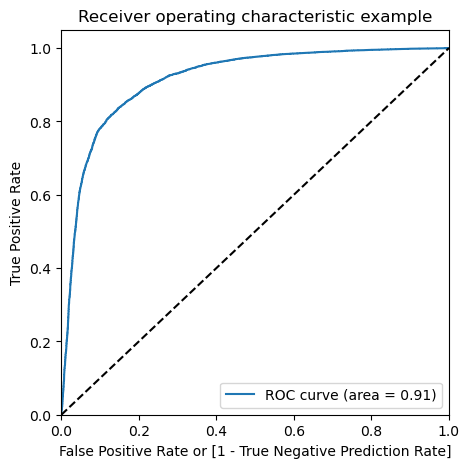

In [275]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point

In [276]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.004291,0,1,0,0,0,0,0,0,0,0,0
1,0,0.359228,0,1,1,1,1,0,0,0,0,0,0
2,0,0.000798,0,1,0,0,0,0,0,0,0,0,0
3,0,0.014716,0,1,0,0,0,0,0,0,0,0,0
4,0,0.002490,0,1,0,0,0,0,0,0,0,0,0


In [277]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.724528     0.979060     0.469996
0.2          0.2  0.779171     0.960636     0.597706
0.3          0.3  0.812246     0.934517     0.689974
0.4          0.4  0.832149     0.904477     0.759822
0.5          0.5  0.840252     0.863115     0.817388
0.6          0.6  0.844025     0.815834     0.872216
0.7          0.7  0.833481     0.753977     0.912986
0.8          0.8  0.795708     0.645875     0.945542
0.9          0.9  0.651387     0.324232     0.978542


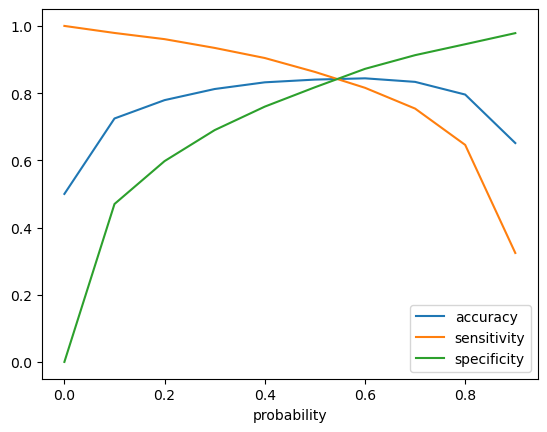

In [278]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Initially we selected the optimum point of classification as 0.5.

From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.

In [279]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.004291,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.359228,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.000798,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.014716,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.002490,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [280]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.840252     0.863115     0.817388
0.51         0.51  0.841546     0.859563     0.823529
0.52         0.52  0.842804     0.855642     0.829967
0.53         0.53  0.843137     0.850906     0.835368
0.54         0.54  0.843137     0.846023     0.840252
0.55         0.55  0.843692     0.841509     0.845875
0.56         0.56  0.844432     0.837070     0.851794
0.57         0.57  0.843655     0.831447     0.855864
0.58         0.58  0.843692     0.825453     0.861931
0.59         0.59  0.843544     0.820570     0.866519


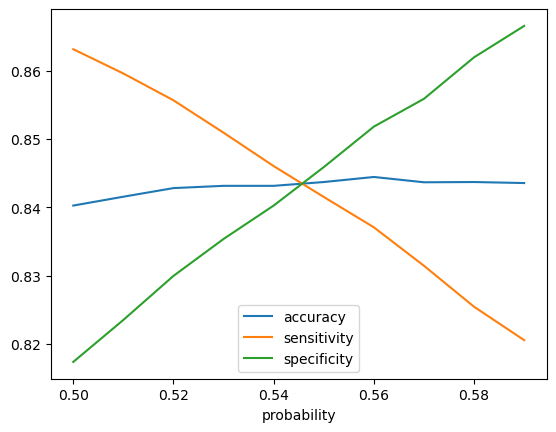

In [281]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.54

In [282]:
#### From the curve above,we can take 0.54 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.004291,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.359228,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.000798,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.014716,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.002490,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [283]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8431372549019608


In [284]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[11290  2225]
 [ 2015 11500]]


In [285]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8509064002959674
Specificity =  0.8353681095079541
False Positive Rate =  0.16463189049204588
Precision =  0.8378870673952641
True Negative Prediction Rate =  0.8485531754979331


Precision and recall tradeoff

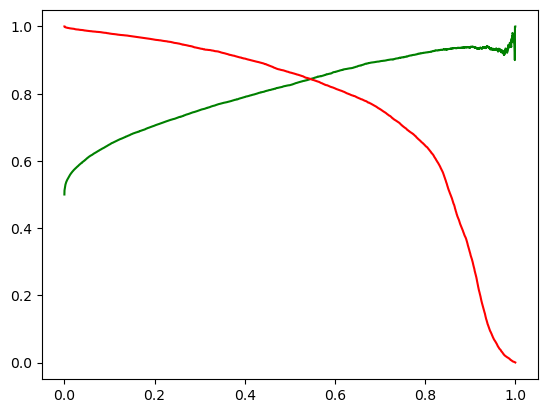

In [286]:
# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making predictions on the test set
Transforming and feature selection for test data

In [287]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,id,onnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_total_rech_amt_67,avg_arpu_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2c_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_monthly_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,Churn
5662,0.080837,0.001560,0.0,0.0,0.000000,0.000000,0.064256,0.001594,0.0,0.0,0.001454,0.0,0.048324,0.004117,0.009489,0.000000,0.000000,0.000000,0.000723,0.010497,0.0,0.000003,0.000547,0.050725,0.059633,0.041935,0.041935,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.284955,0.000000,0.000000,0.000000,0.009948,0.077299,0.104905,0.000000,0.000000,0.000000,0.002561,0.000000,0.105693,0.000000,0.000264,0.000477,0.008497,0.008730,0.0,0.000153,0.053498,0.063840,0.063840,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
66284,0.946952,0.001426,0.0,0.0,0.007615,0.009323,0.014812,0.000000,0.0,0.0,0.006494,0.0,0.011119,0.001189,0.018964,0.005398,0.000000,0.000308,0.000281,0.016777,0.0,0.000000,0.000000,0.123188,0.063991,0.046774,0.006452,0.150000,0.000021,0.071476,0.0,0.125,0.170732,0.205747,0.000000,0.000000,0.000000,0.130794,0.076188,0.024168,0.000000,0.000000,0.033502,0.036915,0.000000,0.025486,0.000000,0.000108,0.000000,0.023685,0.001505,0.0,0.000367,0.144033,0.072319,0.072319,0.100917,0.145552,0.000000,0.0,0.4,0.019608,0.0
46957,0.670824,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.375030,0.000000,0.000000,0.000000,0.004684,0.068877,0.140011,0.010086,0.007547,0.000000,0.002517,0.001574,0.153519,0.114045,0.104097,0.000000,0.098871,0.000000,0.0,0.000000,0.189300,0.029925,0.007481,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0
23344,0.333462,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.252837,0.000000,0.000000,0.040561,0.009650,0.035923,0.002513,0.000000,0.000000,0.012302,0.019192,0.000000,0.002594,0.001164,0.000000,0.000000,0.003640,0.000000,0.0,0.000000,0.053498,0.009975,0.006234,0.073394,0.017598,0.009111,0.0,0.0,0.019608,1.0
31373,0.448173,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000485,0.0,0.000027,0.005098,0.019035,0.015592,0.004545,0.000000,0.004489,0.024485,0.0,0.000000,0.000000,0.224638,0.060168,0.014839,0.013226,0.666667,0.007331,0.118989,0.0,0.000,0.487805,0.655156,0.037413,0.023459,0.000000,0.853757,0.069103,0.000065,0.000230,0.000000,0.000000,0.002613,0.000344,0.000525,0.003500,0.001973,0.000000,0.033884,0.000000,0.0,0.000000,0.209877,0.021696,0.006234,0.559633,0.127078,0.000993,0.0,0.0,0.568627,0.0


In [288]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,roam_og_mou_8,loc_og_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g,avg_arpu_67,avg_total_og_mou_67
5662,0.0,0.064256,0.0,0.0,0.001454,0.048324,0.004117,0.009489,0.000000,0.010497,0.0,0.050725,0.059633,0.041935,0.000000,0.000000,0.0,0.000000,0.077299,0.105693
66284,0.0,0.014812,0.0,0.0,0.006494,0.011119,0.001189,0.018964,0.005398,0.016777,0.0,0.123188,0.063991,0.006452,0.150000,0.000021,0.0,0.000000,0.076188,0.025486
46957,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.068877,0.153519
23344,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.035923,0.002594
31373,0.0,0.000000,0.0,0.0,0.000485,0.000027,0.005098,0.019035,0.015592,0.024485,0.0,0.224638,0.060168,0.013226,0.666667,0.007331,0.0,0.037413,0.069103,0.000525


In [289]:
# Adding constant to the test model.
X_test_SM = stm.add_constant(X_test)

#### Predicting the target variable

In [290]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 5662     0.340534
66284    0.093395
46957    0.945957
23344    0.843935
31373    0.000018
45843    0.500141
39327    0.405944
64773    0.001631
23920    0.837877
65241    0.384598
dtype: float64


In [291]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
5662,0.340534
66284,0.093395
46957,0.945957
23344,0.843935
31373,0.000018


In [292]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [293]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
5662,0
66284,0
46957,1
23344,1
31373,0


In [294]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn_probability,Conv_prob
5662,0,0.340534
66284,0,0.093395
46957,1,0.945957
23344,1,0.843935
31373,0,0.000018


In [295]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn_probability,Conv_prob,test_churn_pred
5662,0,0.340534,0
66284,0,0.093395,0
46957,1,0.945957,1
23344,1,0.843935,1
31373,0,0.000018,0


In [296]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred)

0.8297636046327146

### Metrics Evaluation

In [297]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[4796  960]
 [ 113  434]]


In [298]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [299]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.793418647166362
Specificity =  0.8332175121612231
False Positive Rate =  0.16678248783877692
Precision =  0.3113342898134864
True Negative Prediction Rate =  0.976981055204726


In [300]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  79.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



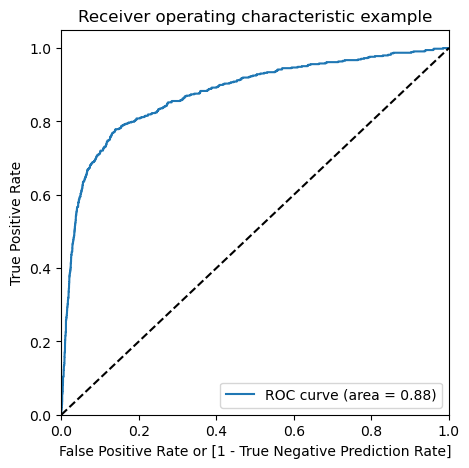

In [301]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn_probability,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_probability,y_pred_final.Conv_prob)

### The AUC score for train dataset is 0.90 and the test dataset is 0.88.
### This model can be considered as a good model.**

# PCA

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [303]:
X_train.shape

(16808, 63)

In [304]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [305]:
pca.fit(X_train)

PCA(random_state=42)

In [306]:
pca.components_

array([[-9.99999544e-01, -2.34186088e-04, -3.37834955e-05, ...,
        -2.40613960e-07,  1.81656797e-07, -2.72631889e-09],
       [-3.26811389e-04,  7.08723686e-03,  1.11265022e-03, ...,
         1.98951500e-04,  2.79103325e-04, -1.05324007e-05],
       [-1.23289955e-04,  2.68765114e-01,  1.74508954e-03, ...,
        -8.53394225e-05, -6.58111931e-05, -2.11040603e-05],
       ...,
       [-5.64283690e-08,  2.52651655e-06, -4.25125763e-06, ...,
        -1.32184759e-02, -2.32996003e-03,  3.42045324e-02],
       [ 3.75300490e-08,  1.87290445e-05, -6.15957000e-06, ...,
        -3.91205623e-04, -1.19447569e-03, -3.71034372e-02],
       [-1.47397249e-10, -2.30968998e-08, -1.80209120e-06, ...,
         4.90449724e-05,  1.17899622e-04, -4.82998241e-03]])

#### Analysing the explained variance ratio

In [307]:
pca.explained_variance_ratio_

array([9.83278130e-01, 5.27615100e-03, 3.18820203e-03, 2.31018340e-03,
       1.72894853e-03, 6.66329078e-04, 6.16750462e-04, 5.55906732e-04,
       4.69542001e-04, 3.73966067e-04, 3.43695646e-04, 2.07966639e-04,
       1.70305597e-04, 1.17765719e-04, 9.27123912e-05, 8.48795515e-05,
       7.41879520e-05, 7.25604092e-05, 6.22722965e-05, 5.82476147e-05,
       5.40581981e-05, 3.79140218e-05, 2.36143493e-05, 2.10956296e-05,
       1.78590518e-05, 1.62164292e-05, 1.50376877e-05, 1.33874175e-05,
       9.95547363e-06, 9.53591004e-06, 8.31673980e-06, 5.76419511e-06,
       4.60798827e-06, 2.74228237e-06, 2.66862567e-06, 2.14735824e-06,
       1.44163045e-06, 1.08152162e-06, 9.67610377e-07, 9.49800214e-07,
       6.39717186e-07, 3.27117210e-07, 2.26845339e-07, 1.98559523e-07,
       1.78773637e-07, 1.22974514e-07, 9.97730357e-08, 4.08558886e-08,
       3.42169135e-08, 2.79523895e-08, 1.67567493e-08, 1.36311836e-08,
       3.60415271e-09, 2.43077200e-09, 7.34279251e-10, 6.19234739e-10,
      

In [308]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

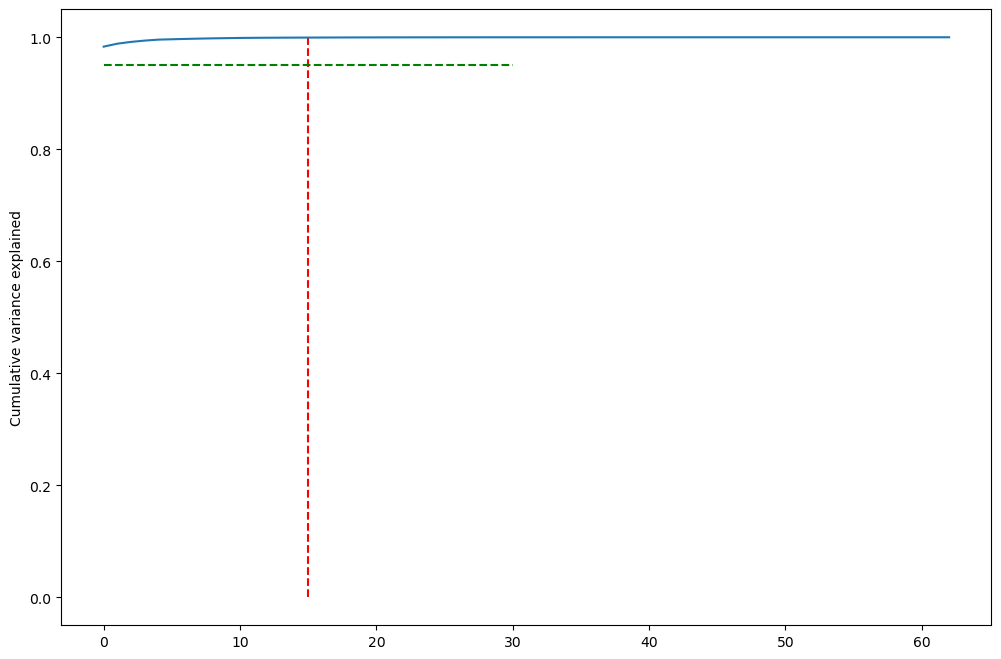

In [309]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

we can use IncrementalPCA for the best result

In [310]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=16)

In [311]:
df_train_pca = pca_final.fit_transform(X_train)

In [312]:
df_train_pca.shape

(16808, 16)

In [313]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [314]:
corrmat.shape

(16, 16)

In [315]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(4202, 16)

## Applying logistic regression on the Principal components

In [316]:
learner_pca = LogisticRegression()

In [317]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [318]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [319]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.83'

Confusion matrix, Sensitivity and Specificity

In [320]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [321]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

[[2473 1397]
 [  39  293]]


In [322]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [323]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.658257972394098
Sensitivity:- 0.8825301204819277
Specificity:- 0.6390180878552971


## Making predictions on the train set

In [324]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [325]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.82'

#### Confusion matrix, Sensitivity and Specificity

In [326]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [327]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

[[9728 5673]
 [ 202 1205]]


In [328]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [329]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.6504640647310804
Sensitivity:- 0.8564321250888415
Specificity:- 0.6316472956301539


###  Decision Tree with PCA

In [330]:
from sklearn.tree import DecisionTreeClassifier

In [331]:
dt = DecisionTreeClassifier(random_state=42)

In [332]:
from sklearn.model_selection import GridSearchCV

In [333]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [334]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [335]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [336]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.175752,0.030002,0.003906,0.006766,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916468,0.91623,0.91623,0.91623,0.91629,0.000103,5
1,0.165263,0.019138,0.000000,0.000000,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916468,0.91623,0.91623,0.91623,0.91629,0.000103,5
2,0.169562,0.020085,0.007812,0.007812,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916468,0.91623,0.91623,0.91623,0.91629,0.000103,5
3,0.183580,0.023109,0.003906,0.006766,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.916468,0.91623,0.91623,0.91623,0.91629,0.000103,5
4,0.175767,0.025614,0.000000,0.000000,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.916468,0.91623,0.91623,0.91623,0.91629,0.000103,5


In [337]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
63,0.681672,0.028018,0.000000,0.000000,20,10,50,"{'max_depth': 20, 'min_samples_leaf': 10, 'min...",0.919086,0.920752,0.909091,0.917182,0.916528,0.004476,1
65,0.597873,0.023152,0.003907,0.006767,20,10,50,"{'max_depth': 20, 'min_samples_leaf': 10, 'min...",0.919086,0.920752,0.909091,0.917182,0.916528,0.004476,1
55,0.466137,0.022892,0.004412,0.007642,10,50,150,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.916944,0.920514,0.911233,0.917182,0.916468,0.003336,3
70,0.474812,0.009040,0.007812,0.007812,20,50,150,"{'max_depth': 20, 'min_samples_leaf': 50, 'min...",0.916944,0.920514,0.911233,0.917182,0.916468,0.003336,3
0,0.175752,0.030002,0.003906,0.006766,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916468,0.916230,0.916230,0.916230,0.916290,0.000103,5


In [338]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)

In [339]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [340]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [341]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [342]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [343]:
evaluate_model(dt_best)

Train Accuracy : 0.9336030461684912
Train Confusion Matrix:
[[15171   230]
 [  886   521]]
--------------------------------------------------
Test Accuracy : 0.9169443122322704
Test Confusion Matrix:
[[3768  102]
 [ 247   85]]


## Random Forest with PCA

In [344]:
from sklearn.ensemble import RandomForestClassifier

In [345]:
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

8


In [346]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, random_state=100, oob_score=True, verbose=1)

In [347]:
rf.fit(df_train_pca, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.7s finished


RandomForestClassifier(max_depth=4, max_features=7, oob_score=True,
                       random_state=100, verbose=1)

In [348]:
rf.oob_score_

0.9167658257972394

In [349]:
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


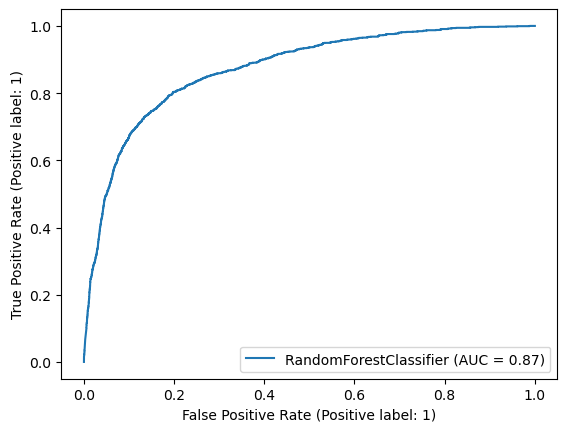

In [350]:
#plot_roc_curve(rf, df_train_pca, y_train)
RocCurveDisplay.from_estimator(rf, df_train_pca, y_train)
plt.show()

Hyper-parameter tuning for the Random Forest

In [351]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [352]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [353]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [354]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [355]:
grid_search.best_score_ 

0.9167658257972395

In [356]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 200}

In [357]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [358]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [359]:
evaluate_model(rfc_model)

Train Accuracy : 0.9174797715373632
Train Confusion Matrix:
[[15392     9]
 [ 1378    29]]
--------------------------------------------------
Test Accuracy : 0.9202760590195145
Test Confusion Matrix:
[[3866    4]
 [ 331    1]]


In [360]:
rfc_model.feature_importances_

array([0.00196534, 0.02101001, 0.09912393, 0.08824091, 0.15054024,
       0.05335912, 0.12915524, 0.04059774, 0.22138721, 0.06877829,
       0.01502912, 0.03013385, 0.01562474, 0.01739516, 0.0200994 ,
       0.0275597 ])

In [361]:
df_train_pca

array([[ 2.67866319e+04, -7.35530791e+02,  5.36265880e+02, ...,
        -9.43396475e+01, -1.42847705e+01, -4.61130843e+01],
       [ 2.15050805e+04, -4.86691607e+02, -8.07861197e+01, ...,
        -1.01058336e+02, -2.15712584e+01, -4.86575642e+00],
       [-2.06113118e+04, -8.13501153e+02, -1.03383999e+03, ...,
         7.27184756e+01, -1.22238053e+02,  1.32195273e+00],
       ...,
       [ 2.39333012e+04, -2.20150501e+02, -9.81317118e+02, ...,
        -1.04267831e+02, -6.20444775e+01, -2.94319817e+02],
       [-1.07748115e+04, -6.06867180e+02, -7.09798370e+02, ...,
        -1.14766122e+02,  4.42559438e+00,  5.00772908e+01],
       [ 2.37532975e+04, -1.83133394e+02, -1.01729862e+03, ...,
         7.06331190e+01, -9.04048279e+01, -6.06249511e+01]])

## Note:
Note that the best parameters procuded the accuracy of 91% which is not significantly deterred than the accuracy of original random forest, which is pegged around 92%

## Conclusion :
The best model to predict the churn is observed to be Random Forest based on the accuracy as performance measure.

The incoming calls (with local same operator mobile/other operator mobile/fixed lines, STD or Special) plays a vital role in understanding the possibility of churn. Hence, the operator should focus on incoming calls data and has to provide some kind of special offers to the customers whose incoming calls turning lower.

## Details:
After cleaning the data, we broadly employed three models as mentioned below including some variations within these models in order to arrive at the best model in each of the cases.

###  Logistic Regression :
Logistic Regression with RFE Logistic regression with PCA Random Forest For each of these models, the summary of performance measures are as follows:

### Logistic Regression
. Train Accuracy : ~90% . Test Accuracy : ~88%

### Logistic regression with PCA
. Train Accuracy : ~92% . Test Accuracy : ~92%

### Decision Tree with PCA:
. Train Accuracy : ~94% . Test Accuracy : ~93%

### Random Forest with PCA:
. Train Accuracy :~ 92% . Test Accuracy :~ 92%

In [362]:
telecom_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [363]:
telecom_test.shape

(30000, 171)

In [364]:
telecom_test.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                316
std_og_t2o_mou                316
loc_ic_t2o_mou                316
last_date_of_month_6            0
last_date_of_month_7          202
last_date_of_month_8          367
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  1169
onnet_mou_7                  1172
onnet_mou_8                  1675
offnet_mou_6                 1169
offnet_mou_7                 1172
offnet_mou_8                 1675
roam_ic_mou_6                1169
roam_ic_mou_7                1172
roam_ic_mou_8                1675
roam_og_mou_6                1169
roam_og_mou_7                1172
roam_og_mou_8                1675
loc_og_t2t_mou_6             1169
loc_og_t2t_mou_7             1172
loc_og_t2t_mou_8             1675
loc_og_t2m_mou_6             1169
loc_og_t2m_mou_7             1172
loc_og_t2m_mou_8             1675
loc_og_t2f_mou

In [365]:
churn_id = telecom_test['id']

In [366]:
telecom_test['tenure'] = (telecom_test['aon']/30).round(0)


In [367]:
telecom_test["avg_arpu_6_7"]= (telecom_test['arpu_6']+telecom_test['arpu_7'])/2


In [368]:
telecom_test.shape

(30000, 173)

In [369]:
churn_test_null = telecom_test.isnull().sum().sum() / np.product(telecom_test.shape) * 100
churn_test_null

15.18402697495183

In [370]:
for col in telecom_test.columns:
    null_col = telecom_test[col].isnull().sum() / telecom_test.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

id : 0.00
circle_id : 0.00
loc_og_t2o_mou : 1.05
std_og_t2o_mou : 1.05
loc_ic_t2o_mou : 1.05
last_date_of_month_6 : 0.00
last_date_of_month_7 : 0.67
last_date_of_month_8 : 1.22
arpu_6 : 0.00
arpu_7 : 0.00
arpu_8 : 0.00
onnet_mou_6 : 3.90
onnet_mou_7 : 3.91
onnet_mou_8 : 5.58
offnet_mou_6 : 3.90
offnet_mou_7 : 3.91
offnet_mou_8 : 5.58
roam_ic_mou_6 : 3.90
roam_ic_mou_7 : 3.91
roam_ic_mou_8 : 5.58
roam_og_mou_6 : 3.90
roam_og_mou_7 : 3.91
roam_og_mou_8 : 5.58
loc_og_t2t_mou_6 : 3.90
loc_og_t2t_mou_7 : 3.91
loc_og_t2t_mou_8 : 5.58
loc_og_t2m_mou_6 : 3.90
loc_og_t2m_mou_7 : 3.91
loc_og_t2m_mou_8 : 5.58
loc_og_t2f_mou_6 : 3.90
loc_og_t2f_mou_7 : 3.91
loc_og_t2f_mou_8 : 5.58
loc_og_t2c_mou_6 : 3.90
loc_og_t2c_mou_7 : 3.91
loc_og_t2c_mou_8 : 5.58
loc_og_mou_6 : 3.90
loc_og_mou_7 : 3.91
loc_og_mou_8 : 5.58
std_og_t2t_mou_6 : 3.90
std_og_t2t_mou_7 : 3.91
std_og_t2t_mou_8 : 5.58
std_og_t2m_mou_6 : 3.90
std_og_t2m_mou_7 : 3.91
std_og_t2m_mou_8 : 5.58
std_og_t2f_mou_6 : 3.90
std_og_t2f_mou_7 : 3.9

In [371]:
for col in telecom_test.columns:
    null_col = telecom_test[col].isnull().sum() / telecom_test.shape[0] * 100
    if null_col > 0:
        telecom_test[col] = telecom_test[col].fillna(telecom_test[col].mode()[0])

In [372]:
telecom_test.isnull().sum().sum()

0

In [373]:
telecom_test.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'tenure', 'avg_arpu_6_7'],
      dtype='object', length=173)

In [374]:
X.columns

Index(['id', 'onnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'avg_total_rech_amt_67', 'avg_arpu_67',
       'avg_offnet_mou_67', 'avg_roam_ic_mou_67', 'avg_roam_og_mou_67',
       'avg_loc_og_t2c_mou_67', 'avg_spl_og_mou_67', 'avg_og_others_67',
       'avg_total_og_mou_67', 'avg_std_ic_t2t_mou_67', 'avg_std_ic_t2m_mou_67',
       'avg_std_ic_t2f_mou_67', 'avg_tota

In [375]:
telecom_test.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'tenure', 'avg_arpu_6_7'],
      dtype='object', length=173)

In [376]:
churn_id = telecom_test['id']
len(churn_id)

30000

In [377]:
final_prediction = pd.DataFrame({'id':telecom_test.id,'churn_probability':y_pred_final.churn_probability})

In [378]:
final_prediction.to_csv('Submission.csv',index=False)
final_prediction.head

<bound method NDFrame.head of             id  churn_probability
0      69999.0                NaN
1      70000.0                NaN
2      70001.0                NaN
3      70002.0                NaN
4      70003.0                NaN
...        ...                ...
69939      NaN                0.0
69963      NaN                0.0
69967      NaN                0.0
69984      NaN                0.0
69993      NaN                0.0

[33533 rows x 2 columns]>